# Scatter Plots

## Load Libraries

In [11]:
from obspy import UTCDateTime
from scipy.signal import welch
from tqdm import tqdm
from pathlib import Path

import os, sys
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# from andbro__store_as_pickle import __store_as_pickle

In [12]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

## Configurations

In [13]:
## ---------------------------------------

name0 = "FFBI_BDO"

name1 = "FUR_BHN"
name2 = "FUR_BHE"
name3 = "FUR_BHZ"


# t1 ,t2 = "2023-09-23", "2023-10-23"

In [14]:
# ## ---------------------------------------

config = {}

## specify paths
config['path_to_figs'] = data_path+f"LNM2/figures/scatter/"

config['path_to_data'] = data_path+f"LNM2/data/"


## Methods

In [15]:
from functions.get_octave_bands import __get_octave_bands

In [16]:
def __quantile_regression(x, y, quantiles=[0.05, 0.5, 0.95]):


    from sklearn.utils.fixes import parse_version, sp_version
    from sklearn.linear_model import QuantileRegressor
    from numpy import newaxis, zeros_like, bool_, logical_or, array

    # This is line is to avoid incompatibility if older SciPy version.
    # You should use `solver="highs"` with recent version of SciPy.
    solver = "highs" if sp_version >= parse_version("1.6.0") else "interior-point"

    predictions = {}

    x = array(x)
    X = x[:, newaxis]

    out_bounds_predictions = zeros_like(y, dtype=bool_)

    for quantile in quantiles:
        qr = QuantileRegressor(quantile=quantile, alpha=0, solver=solver)
        y_pred = qr.fit(X, y).predict(X)
        predictions[quantile] = y_pred

        if quantile == min(quantiles):
            out_bounds_predictions = logical_or(
                out_bounds_predictions, y_pred >= y
            )
        elif quantile == max(quantiles):
            out_bounds_predictions = logical_or(
                out_bounds_predictions, y_pred <= y
            )

    # print(qr.score(X, y))
    return predictions

In [17]:
def __compute_orthogonal_distance_regression(x_array, y_array, xerr=None, yerr=None, bx=None, by=None):

    from scipy import odr
    from numpy import power, mean, std

    def __model(B, x):
        return 1*x+B[0]

    if bx is None and by is None:
        bx, by = 0, mean(y_array)/mean(x_array)

    if xerr is None and yerr is None:
        xerr, yerr = std(x_array), std(y_array)

#     data = odr.RealData(x_array, y_array)
    data = odr.Data(x_array, y_array, wd=1./xerr, we=1./yerr)

    # odr = odr.ODR(data, model=odr.unilinear)
    M = odr.Model(__model)
    odr = odr.ODR(data, model=M, beta0=[1])

    output = odr.run()

    # slope, intercept = output.beta
    slope, intercept = 1, output.beta

    return slope, intercept

## Plot all 

In [90]:
dat0 = pd.read_pickle(config['path_to_data']+name0+".pkl")

dat1 = pd.read_pickle(config['path_to_data']+name1+".pkl")
dat2 = pd.read_pickle(config['path_to_data']+name2+".pkl")
dat3 = pd.read_pickle(config['path_to_data']+name3+".pkl")

coh1 = pd.read_pickle(config['path_to_data']+name1+"_coherence.pkl")
coh2 = pd.read_pickle(config['path_to_data']+name2+"_coherence.pkl")
coh3 = pd.read_pickle(config['path_to_data']+name3+"_coherence.pkl")


Index(['dates', 0.00103, 0.00109, 0.00115, 0.00122,  0.0013, 0.00137, 0.00145,
       0.00154, 0.00163,
       ...
       0.61306, 0.64938, 0.68786, 0.72862, 0.77179, 0.81752, 0.86596, 0.91728,
       0.97163,  1.0292],
      dtype='object', length=122)

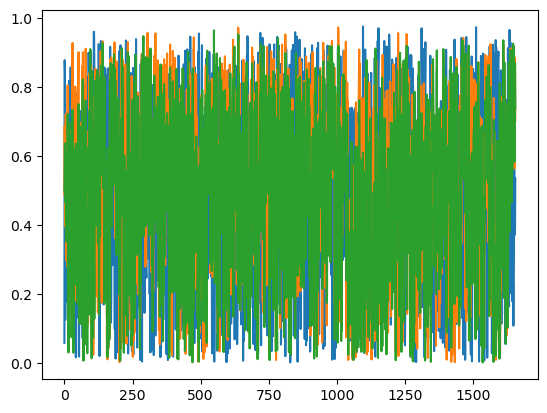

In [91]:
plt.plot(np.array(coh3.iloc[:,2]))
plt.plot(np.array(coh2.iloc[:,2]))
plt.plot(np.array(coh1.iloc[:,2]))

In [96]:
for col in dat0.columns:
    dat0[col] = dat0[col].astype("float")
for col in dat1.columns:
    dat1[col] = dat1[col].astype("float")
for col in dat2.columns:
    dat2[col] = dat2[col].astype("float")
for col in dat3.columns:
    dat3[col] = dat3[col].astype("float")

for col in coh1.columns:
    coh1[col] = coh1[col].astype("float")
for col in coh2.columns:
    coh2[col] = coh2[col].astype("float")
for col in coh3.columns:
    coh3[col] = coh3[col].astype("float")


dates
0.00103
0.00109
0.00115
0.00122
0.0013
0.00137
0.00145
0.00154
0.00163
0.00173
0.00183
0.00194
0.00205
0.00218
0.0023
0.00244
0.00259
0.00274
0.0029
0.00307
0.00325
0.00345
0.00365
0.00387
0.0041
0.00434
0.0046
0.00487
0.00516
0.00546
0.00579
0.00613
0.00649
0.00688
0.00729
0.00772
0.00818
0.00866
0.00917
0.00972
0.01029
0.0109
0.01155
0.01223
0.01296
0.01372
0.01454
0.0154
0.01631
0.01728
0.0183
0.01939
0.02054
0.02175
0.02304
0.02441
0.02585
0.02738
0.02901
0.03073
0.03255
0.03447
0.03652
0.03868
0.04097
0.0434
0.04597
0.0487
0.05158
0.05464
0.05788
0.06131
0.06494
0.06879
0.07286
0.07718
0.08175
0.0866
0.09173
0.09716
0.10292
0.10902
0.11548
0.12232
0.12957
0.13725
0.14538
0.15399
0.16312
0.17278
0.18302
0.19387
0.20535
0.21752
0.23041
0.24406
0.25852
0.27384
0.29007
0.30726
0.32546
0.34475
0.36517
0.38681
0.40973
0.43401
0.45973
0.48697
0.51582
0.54639
0.57876
0.61306
0.64938
0.68786
0.72862
0.77179
0.81752
0.86596
0.91728
0.97163
1.0292
dates      float64
0.00103    float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


dates      float64
0.00103    float64
dtype: object
dates      float64
0.00103    float64
dtype: object
dates      float64
0.00103    float64
dtype: object
dates      float64
0.00103    float64
dtype: object
dates      float64
0.00103    float64
dtype: object
dates      float64
0.00103    float64
dtype: object
dates      float64
0.00103    float64
dtype: object
name 'odr1_inter' is not defined


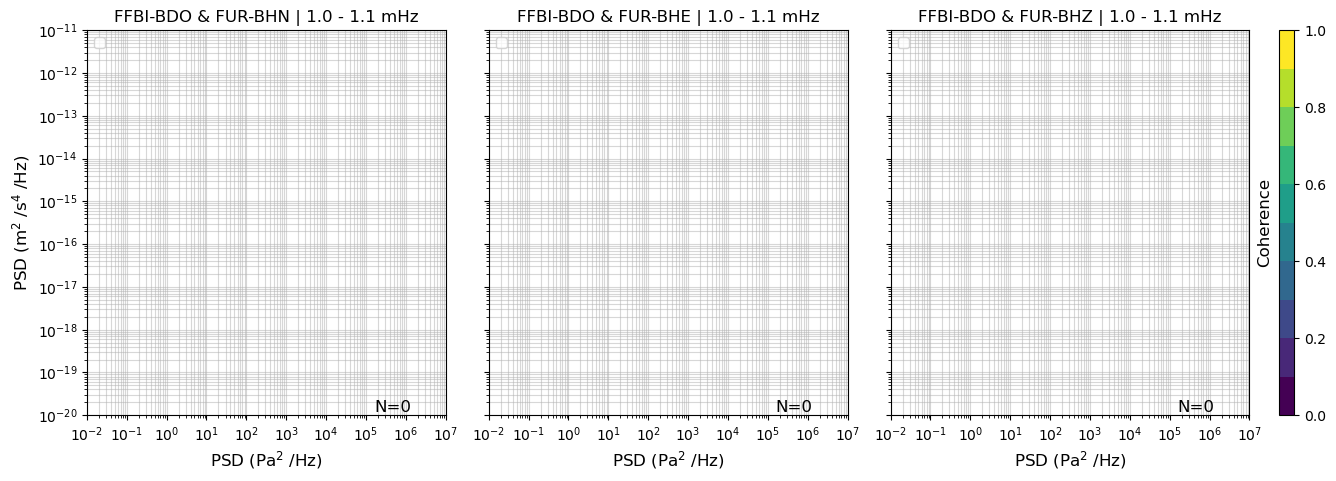

dates      float64
0.00109    float64
dtype: object
dates      float64
0.00109    float64
dtype: object
dates      float64
0.00109    float64
dtype: object
dates      float64
0.00109    float64
dtype: object
dates      float64
0.00109    float64
dtype: object
dates      float64
0.00109    float64
dtype: object
dates      float64
0.00109    float64
dtype: object


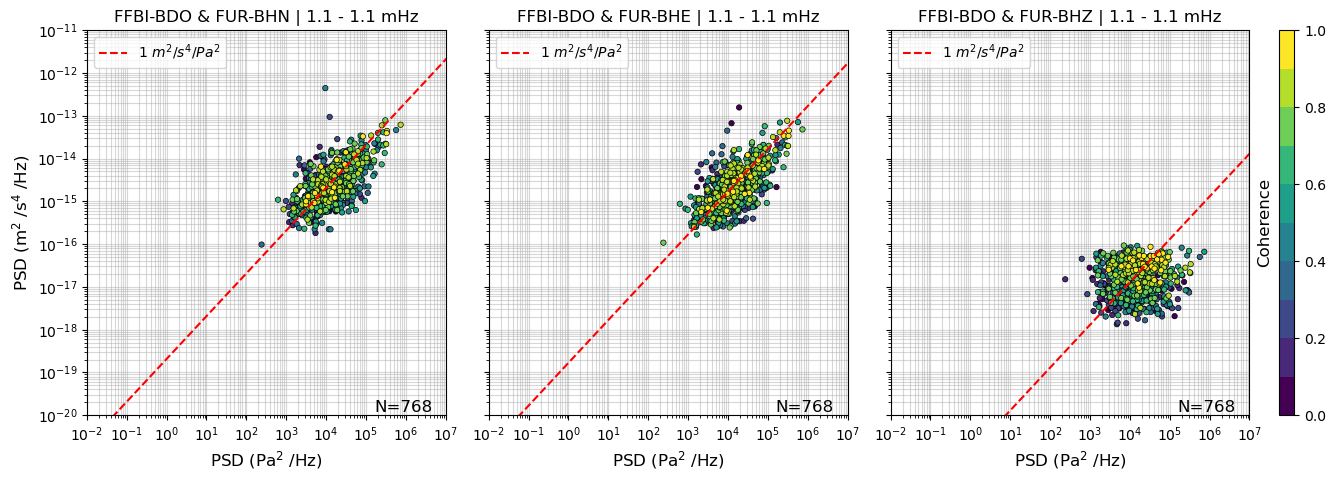

dates      float64
0.00115    float64
dtype: object
dates      float64
0.00115    float64
dtype: object
dates      float64
0.00115    float64
dtype: object
dates      float64
0.00115    float64
dtype: object
dates      float64
0.00115    float64
dtype: object
dates      float64
0.00115    float64
dtype: object
dates      float64
0.00115    float64
dtype: object


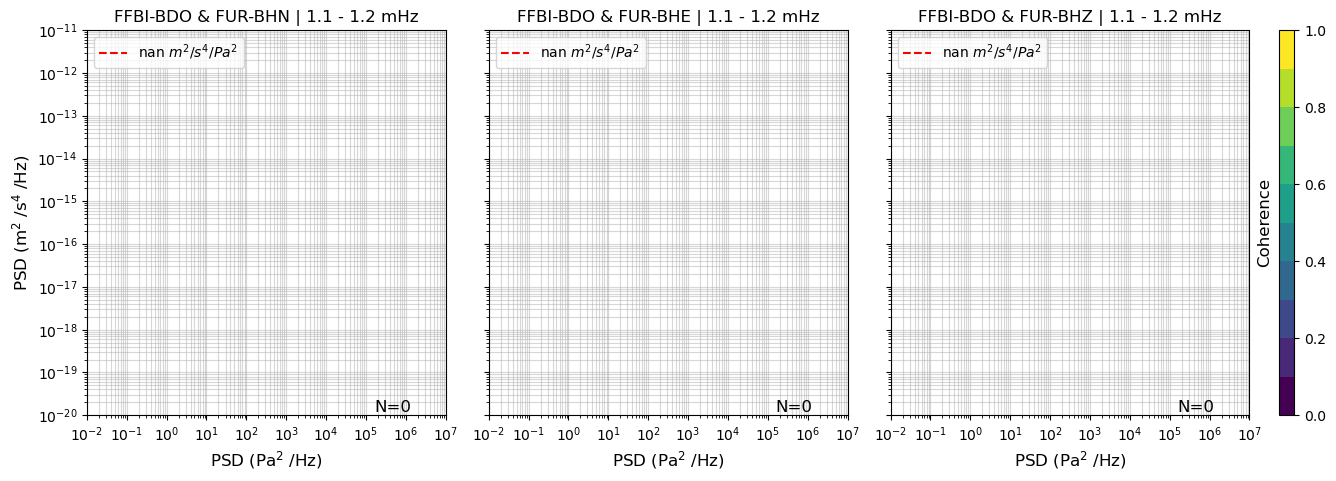

dates      float64
0.00122    float64
dtype: object
dates      float64
0.00122    float64
dtype: object
dates      float64
0.00122    float64
dtype: object
dates      float64
0.00122    float64
dtype: object
dates      float64
0.00122    float64
dtype: object
dates      float64
0.00122    float64
dtype: object
dates      float64
0.00122    float64
dtype: object


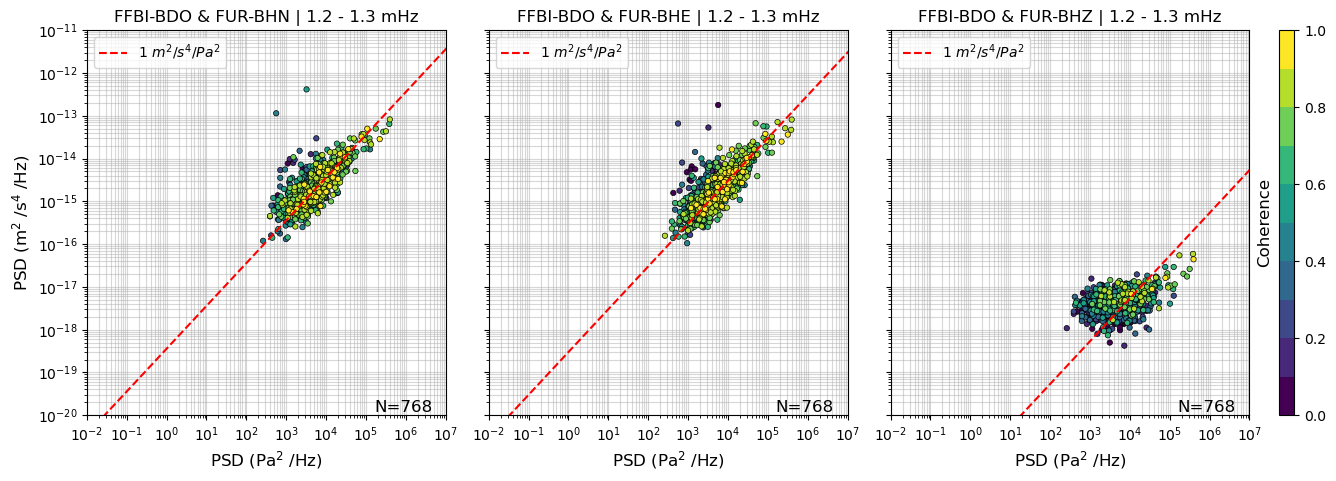

dates     float64
0.0013    float64
dtype: object
dates     float64
0.0013    float64
dtype: object
dates     float64
0.0013    float64
dtype: object
dates     float64
0.0013    float64
dtype: object
dates     float64
0.0013    float64
dtype: object
dates     float64
0.0013    float64
dtype: object
dates     float64
0.0013    float64
dtype: object


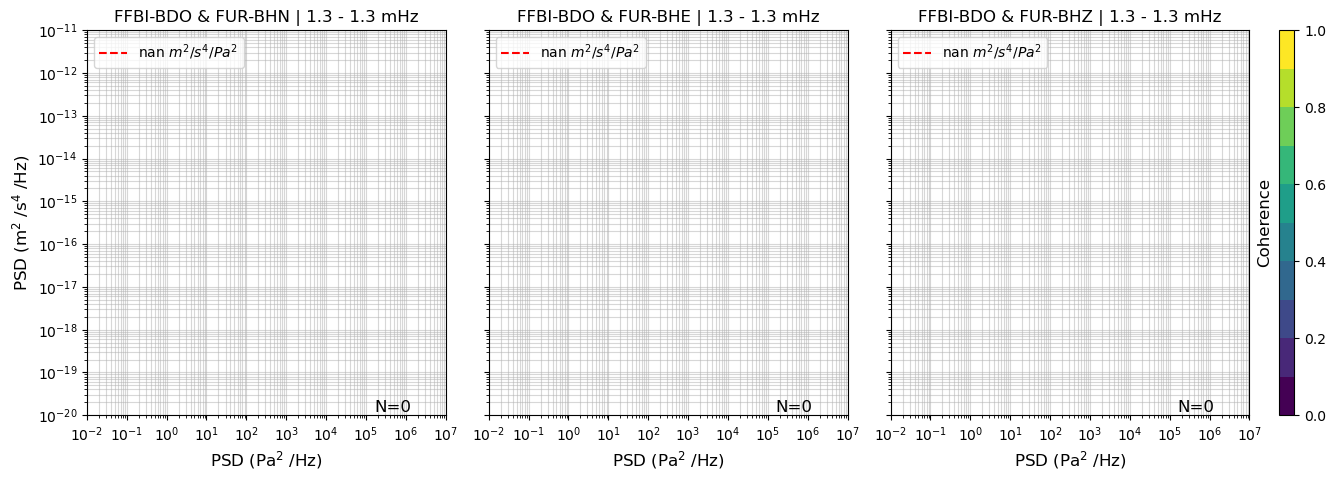

dates      float64
0.00137    float64
dtype: object
dates      float64
0.00137    float64
dtype: object
dates      float64
0.00137    float64
dtype: object
dates      float64
0.00137    float64
dtype: object
dates      float64
0.00137    float64
dtype: object
dates      float64
0.00137    float64
dtype: object
dates      float64
0.00137    float64
dtype: object


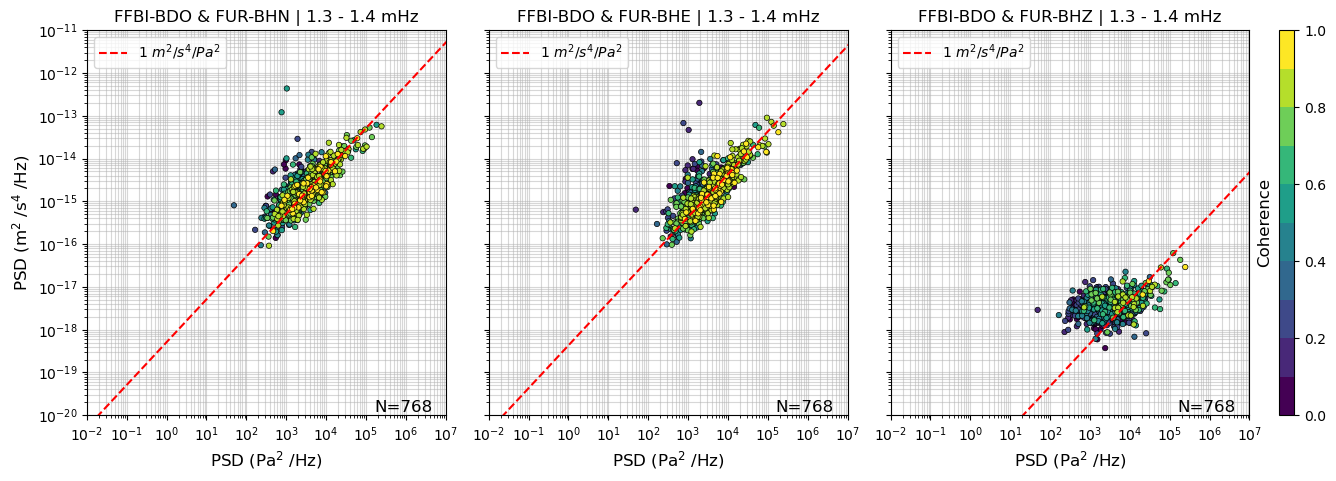

dates      float64
0.00145    float64
dtype: object
dates      float64
0.00145    float64
dtype: object
dates      float64
0.00145    float64
dtype: object
dates      float64
0.00145    float64
dtype: object
dates      float64
0.00145    float64
dtype: object
dates      float64
0.00145    float64
dtype: object
dates      float64
0.00145    float64
dtype: object


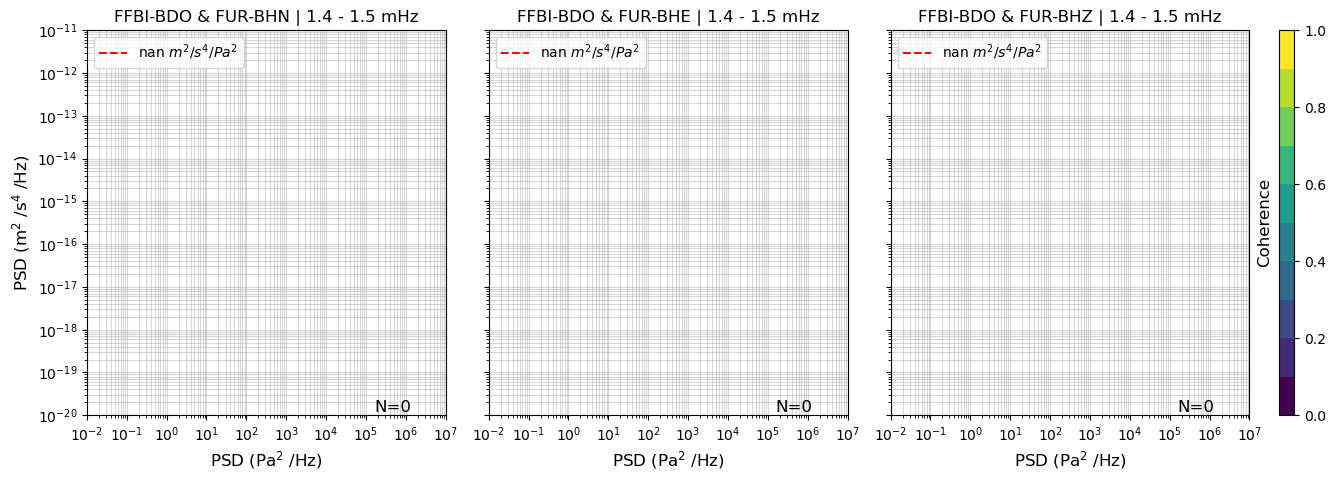

dates      float64
0.00154    float64
dtype: object
dates      float64
0.00154    float64
dtype: object
dates      float64
0.00154    float64
dtype: object
dates      float64
0.00154    float64
dtype: object
dates      float64
0.00154    float64
dtype: object
dates      float64
0.00154    float64
dtype: object
dates      float64
0.00154    float64
dtype: object


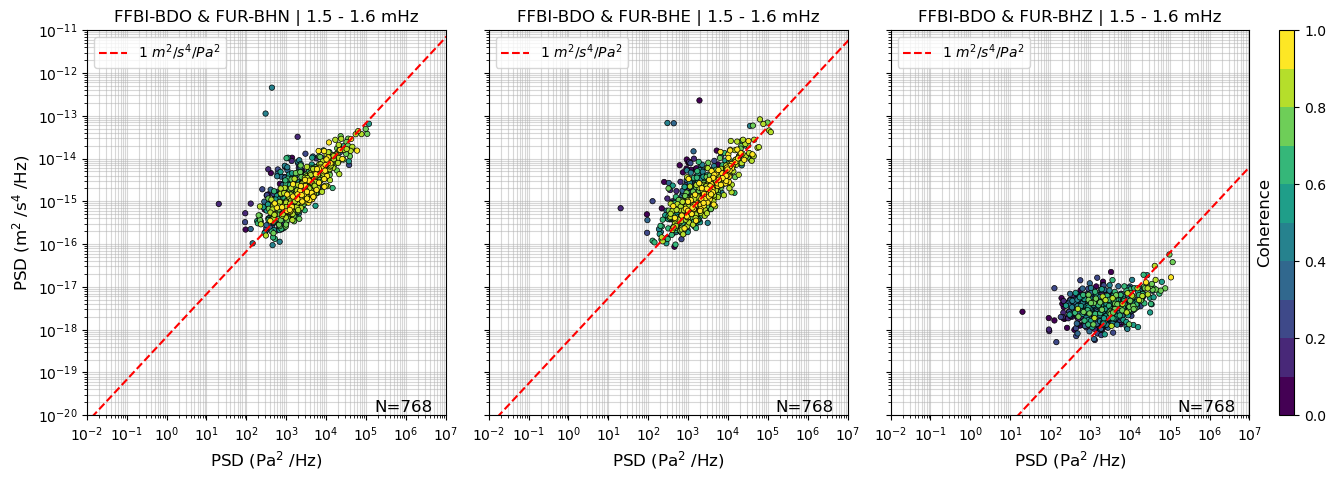

dates      float64
0.00163    float64
dtype: object
dates      float64
0.00163    float64
dtype: object
dates      float64
0.00163    float64
dtype: object
dates      float64
0.00163    float64
dtype: object
dates      float64
0.00163    float64
dtype: object
dates      float64
0.00163    float64
dtype: object
dates      float64
0.00163    float64
dtype: object


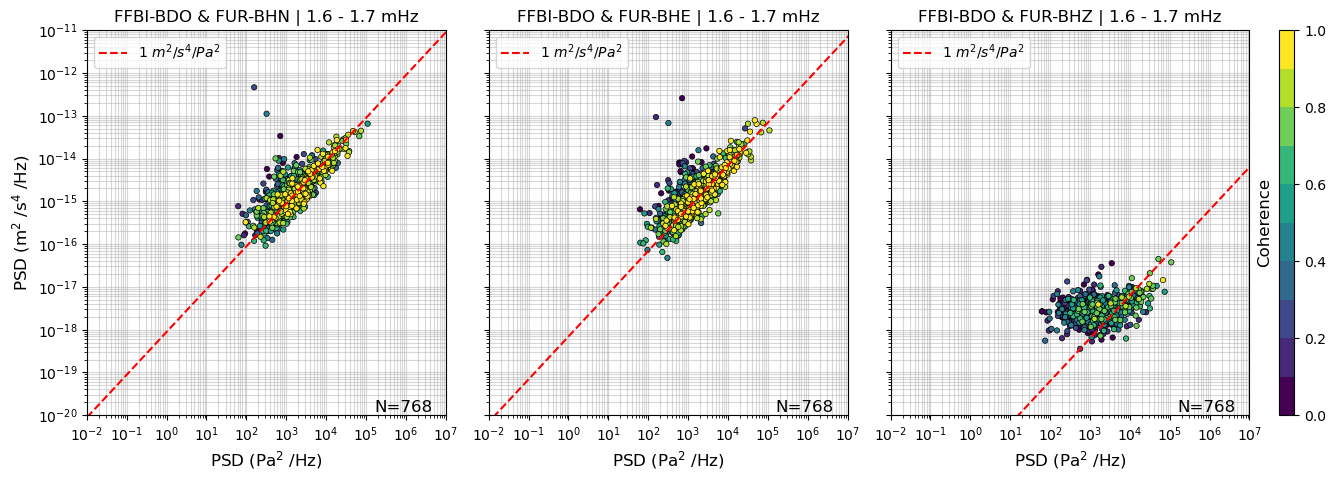

dates      float64
0.00173    float64
dtype: object
dates      float64
0.00173    float64
dtype: object
dates      float64
0.00173    float64
dtype: object
dates      float64
0.00173    float64
dtype: object
dates      float64
0.00173    float64
dtype: object
dates      float64
0.00173    float64
dtype: object
dates      float64
0.00173    float64
dtype: object


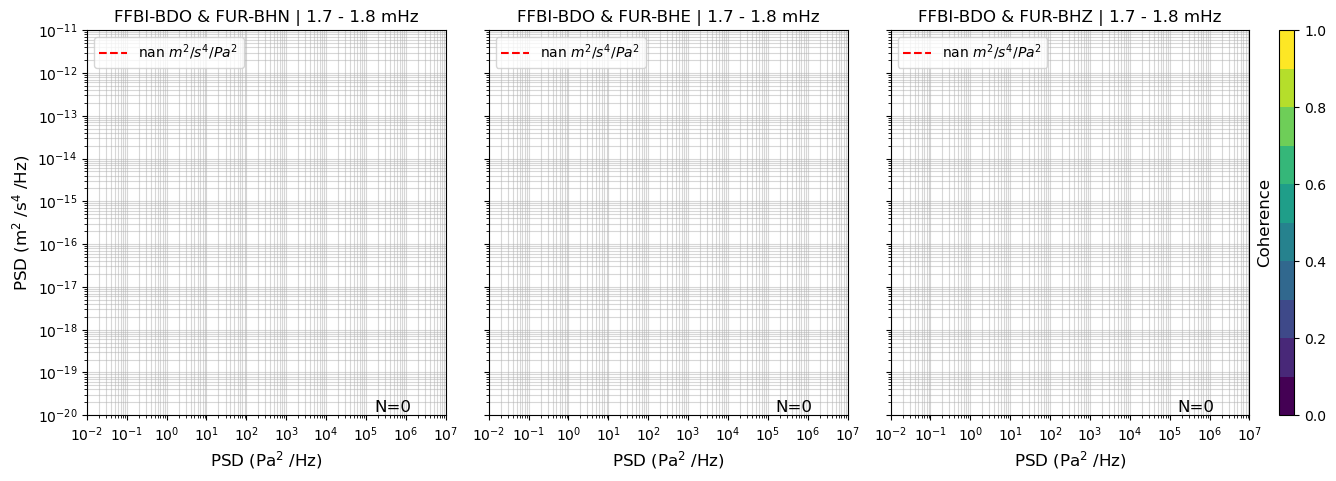

dates      float64
0.00183    float64
dtype: object
dates      float64
0.00183    float64
dtype: object
dates      float64
0.00183    float64
dtype: object
dates      float64
0.00183    float64
dtype: object
dates      float64
0.00183    float64
dtype: object
dates      float64
0.00183    float64
dtype: object
dates      float64
0.00183    float64
dtype: object


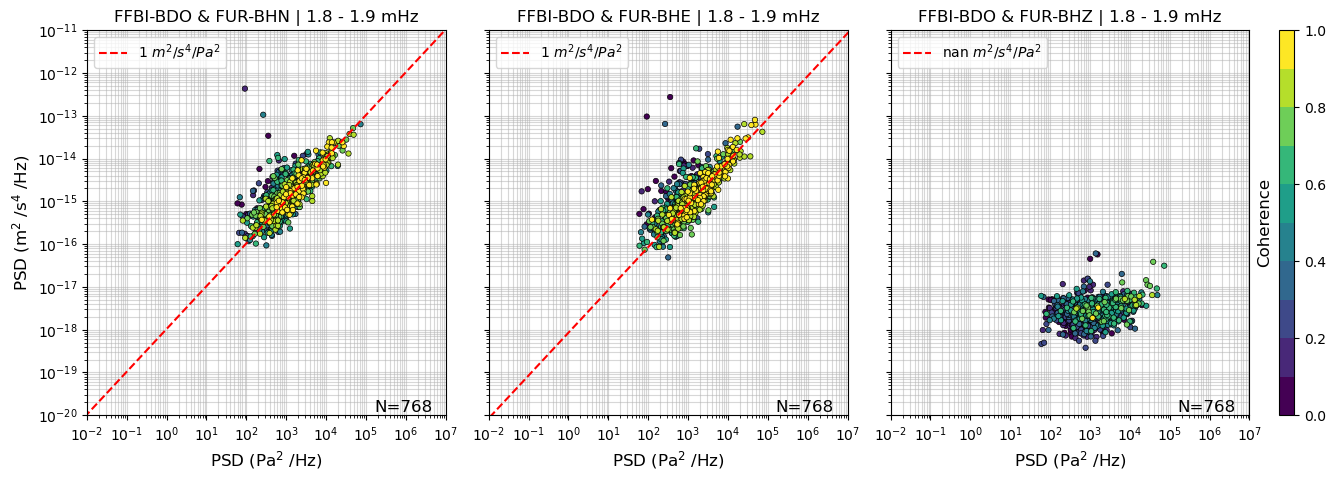

dates      float64
0.00194    float64
dtype: object
dates      float64
0.00194    float64
dtype: object
dates      float64
0.00194    float64
dtype: object
dates      float64
0.00194    float64
dtype: object
dates      float64
0.00194    float64
dtype: object
dates      float64
0.00194    float64
dtype: object
dates      float64
0.00194    float64
dtype: object


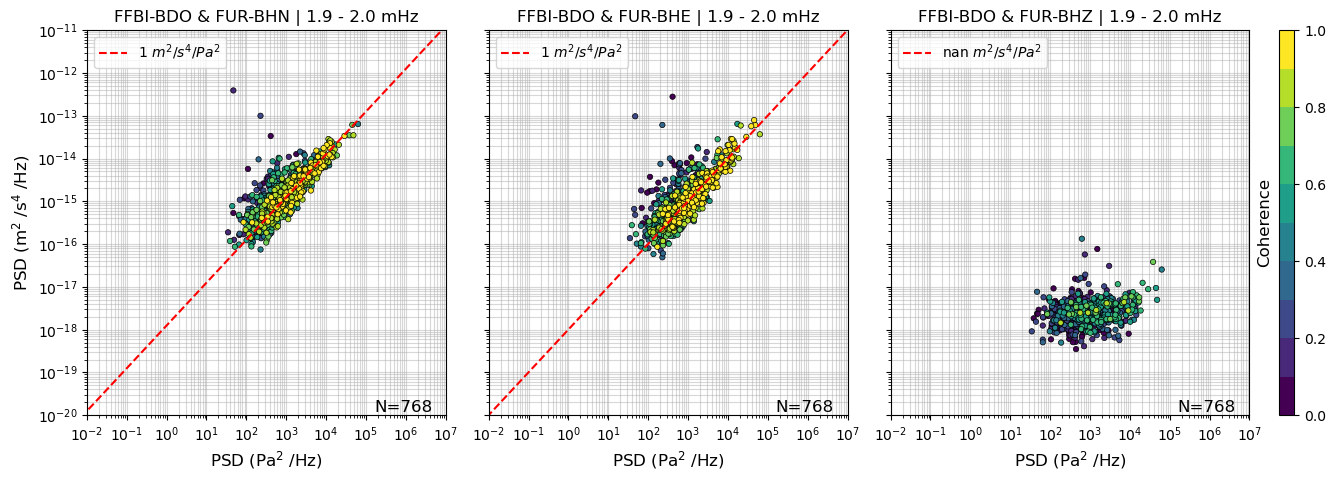

dates      float64
0.00205    float64
dtype: object
dates      float64
0.00205    float64
dtype: object
dates      float64
0.00205    float64
dtype: object
dates      float64
0.00205    float64
dtype: object
dates      float64
0.00205    float64
dtype: object
dates      float64
0.00205    float64
dtype: object
dates      float64
0.00205    float64
dtype: object


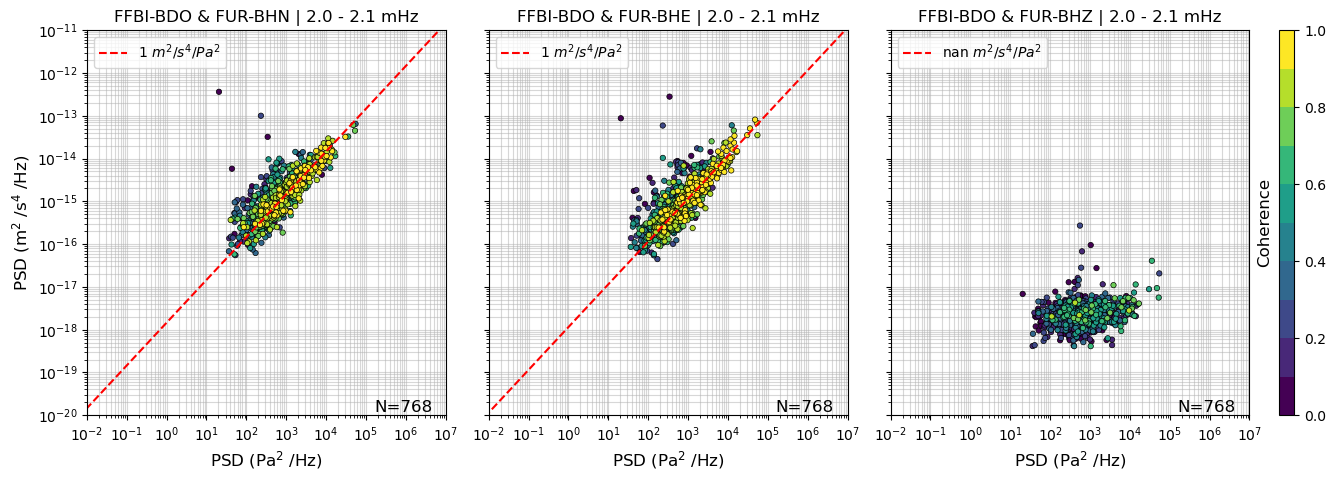

dates      float64
0.00218    float64
dtype: object
dates      float64
0.00218    float64
dtype: object
dates      float64
0.00218    float64
dtype: object
dates      float64
0.00218    float64
dtype: object
dates      float64
0.00218    float64
dtype: object
dates      float64
0.00218    float64
dtype: object
dates      float64
0.00218    float64
dtype: object


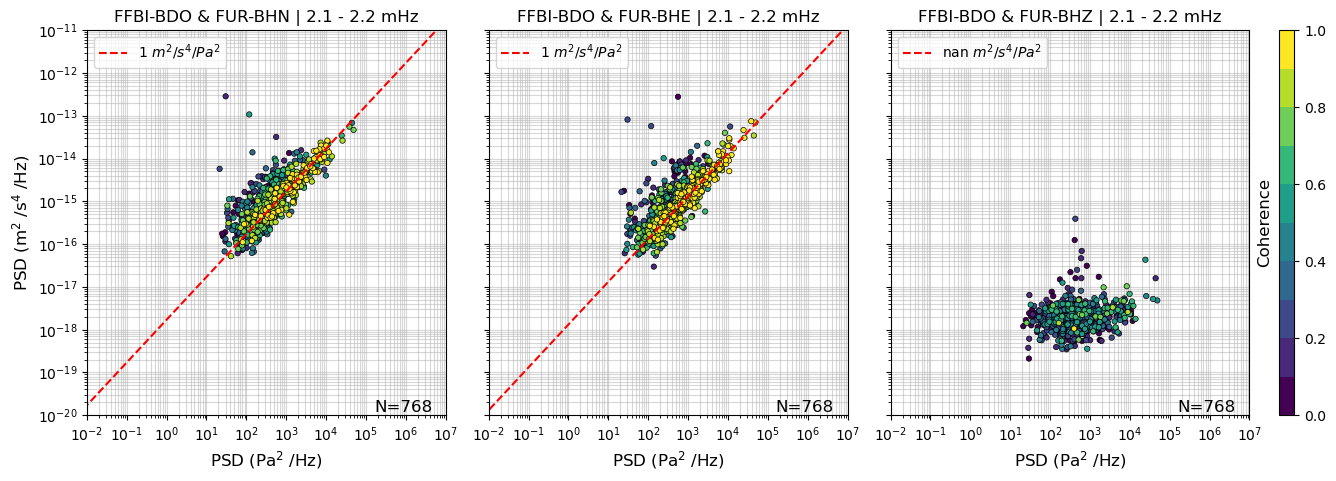

dates     float64
0.0023    float64
dtype: object
dates     float64
0.0023    float64
dtype: object
dates     float64
0.0023    float64
dtype: object
dates     float64
0.0023    float64
dtype: object
dates     float64
0.0023    float64
dtype: object
dates     float64
0.0023    float64
dtype: object
dates     float64
0.0023    float64
dtype: object


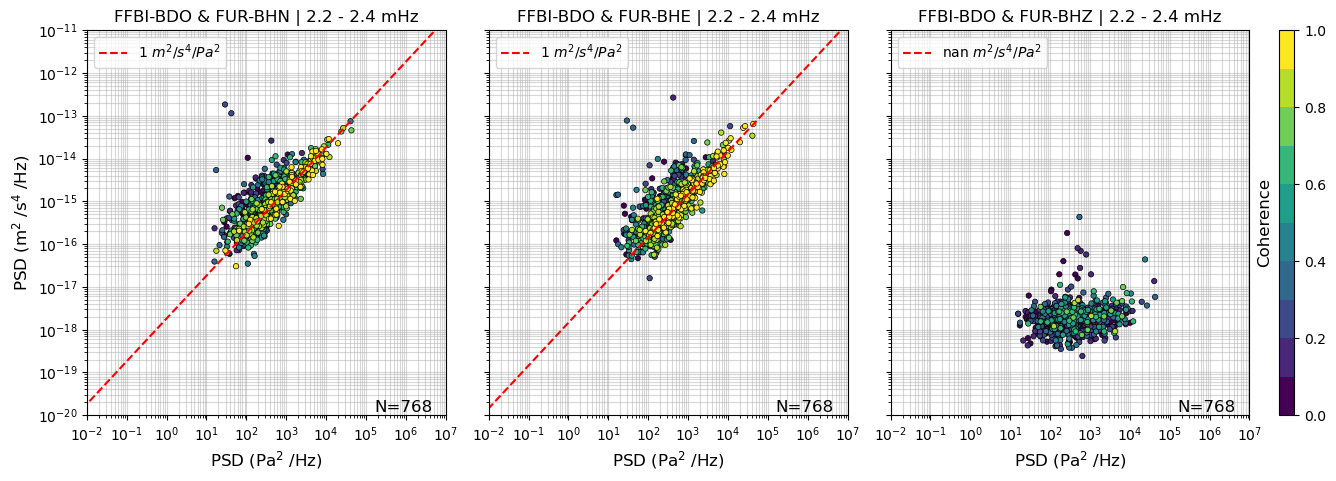

dates      float64
0.00244    float64
dtype: object
dates      float64
0.00244    float64
dtype: object
dates      float64
0.00244    float64
dtype: object
dates      float64
0.00244    float64
dtype: object
dates      float64
0.00244    float64
dtype: object
dates      float64
0.00244    float64
dtype: object
dates      float64
0.00244    float64
dtype: object


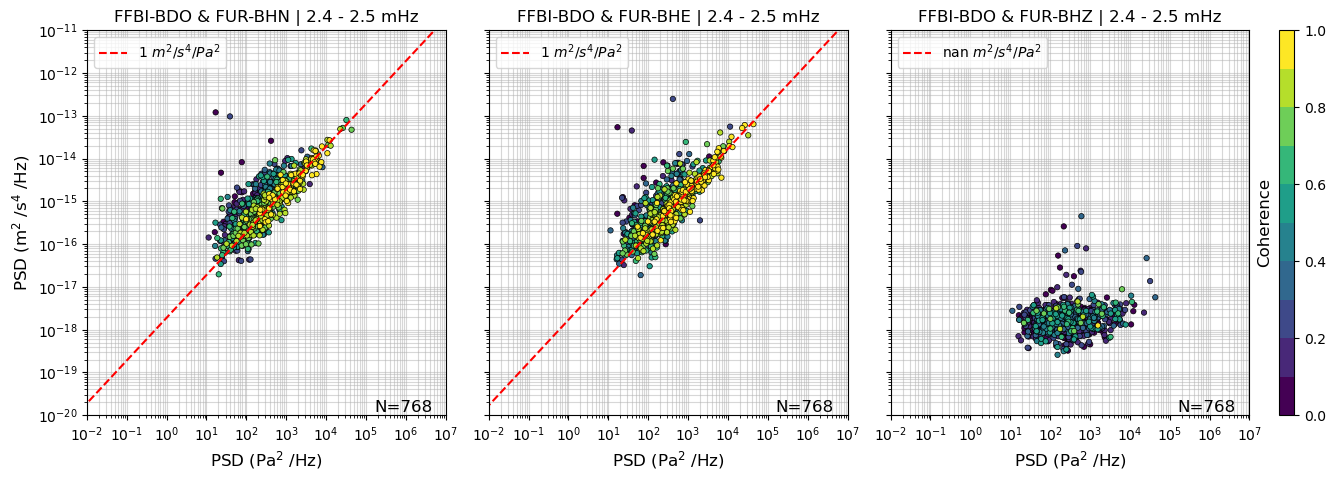

dates      float64
0.00259    float64
dtype: object
dates      float64
0.00259    float64
dtype: object
dates      float64
0.00259    float64
dtype: object
dates      float64
0.00259    float64
dtype: object
dates      float64
0.00259    float64
dtype: object
dates      float64
0.00259    float64
dtype: object
dates      float64
0.00259    float64
dtype: object


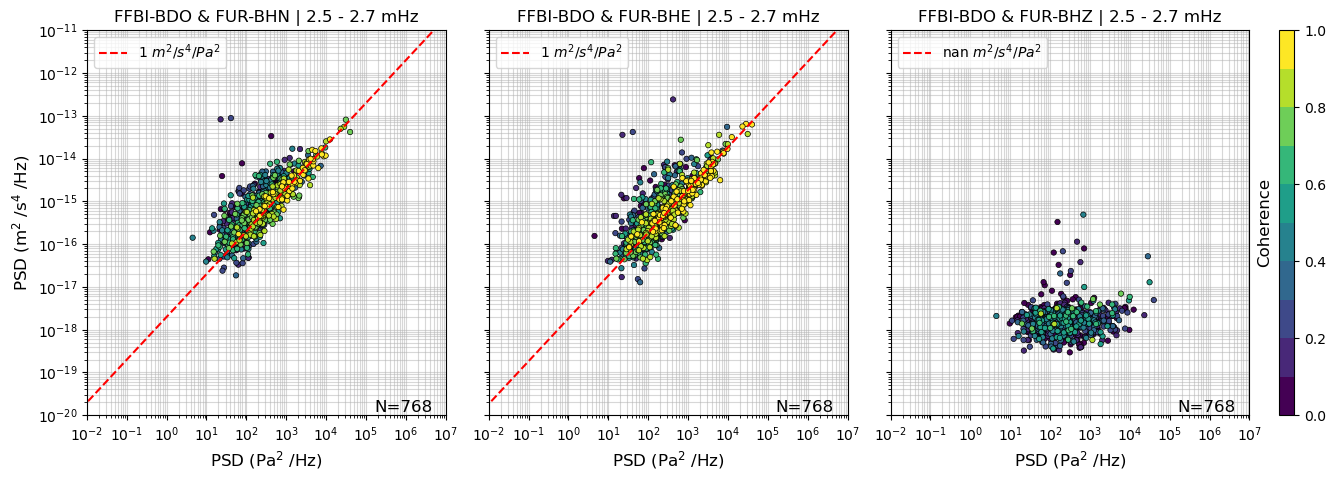

dates      float64
0.00274    float64
dtype: object
dates      float64
0.00274    float64
dtype: object
dates      float64
0.00274    float64
dtype: object
dates      float64
0.00274    float64
dtype: object
dates      float64
0.00274    float64
dtype: object
dates      float64
0.00274    float64
dtype: object
dates      float64
0.00274    float64
dtype: object


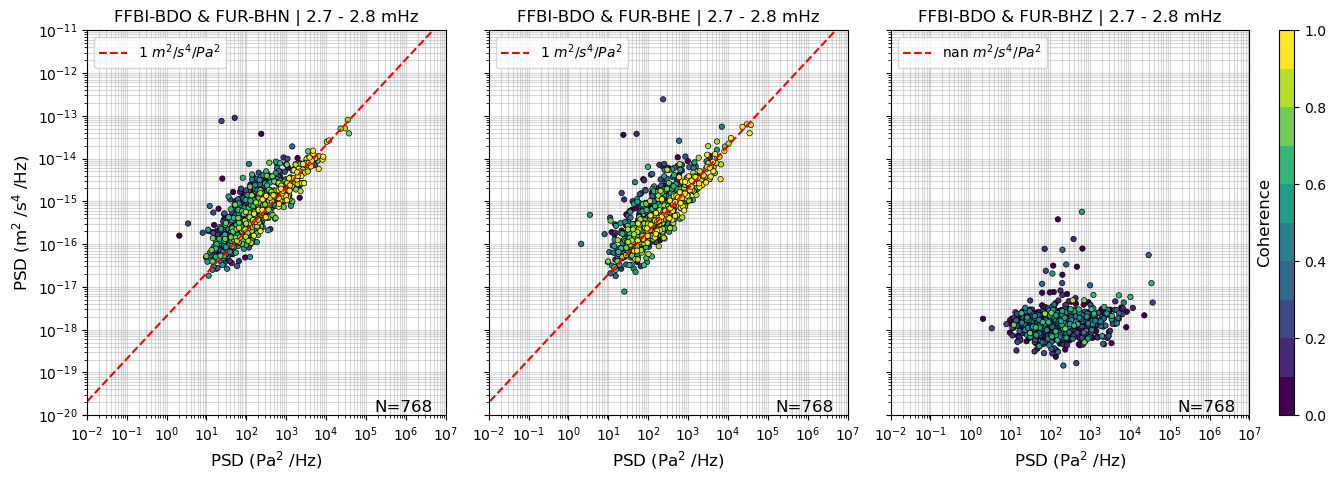

dates     float64
0.0029    float64
dtype: object
dates     float64
0.0029    float64
dtype: object
dates     float64
0.0029    float64
dtype: object
dates     float64
0.0029    float64
dtype: object
dates     float64
0.0029    float64
dtype: object
dates     float64
0.0029    float64
dtype: object
dates     float64
0.0029    float64
dtype: object


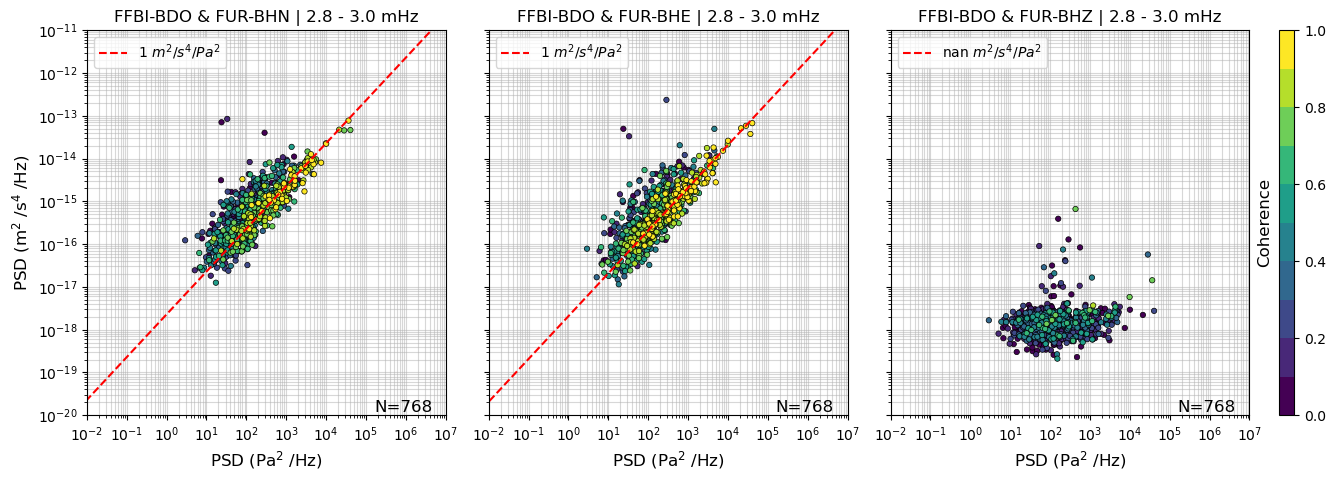

dates      float64
0.00307    float64
dtype: object
dates      float64
0.00307    float64
dtype: object
dates      float64
0.00307    float64
dtype: object
dates      float64
0.00307    float64
dtype: object
dates      float64
0.00307    float64
dtype: object
dates      float64
0.00307    float64
dtype: object
dates      float64
0.00307    float64
dtype: object


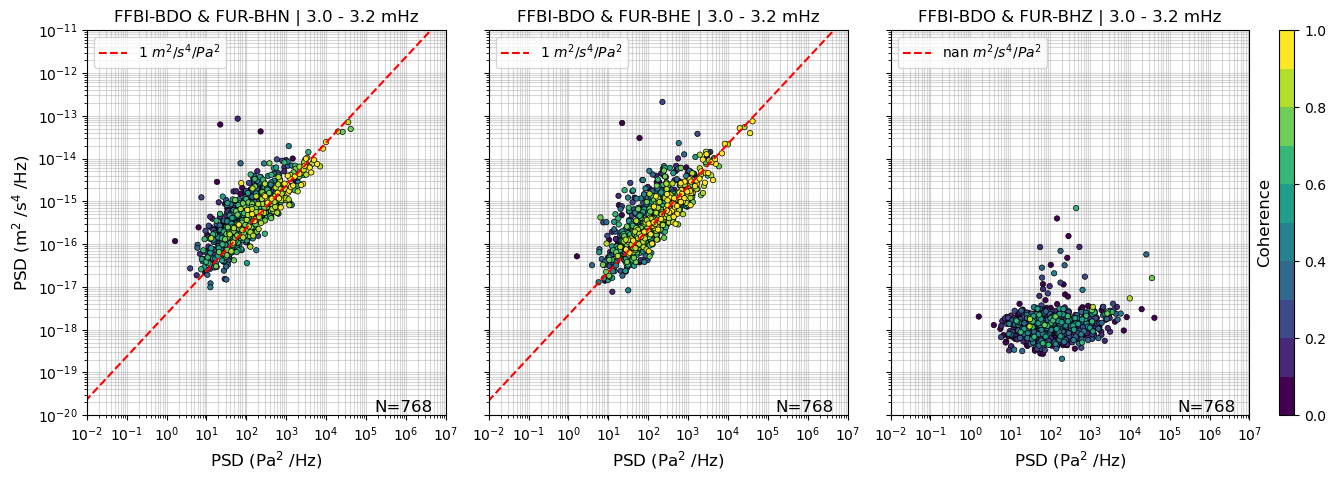

dates      float64
0.00325    float64
dtype: object
dates      float64
0.00325    float64
dtype: object
dates      float64
0.00325    float64
dtype: object
dates      float64
0.00325    float64
dtype: object
dates      float64
0.00325    float64
dtype: object
dates      float64
0.00325    float64
dtype: object
dates      float64
0.00325    float64
dtype: object


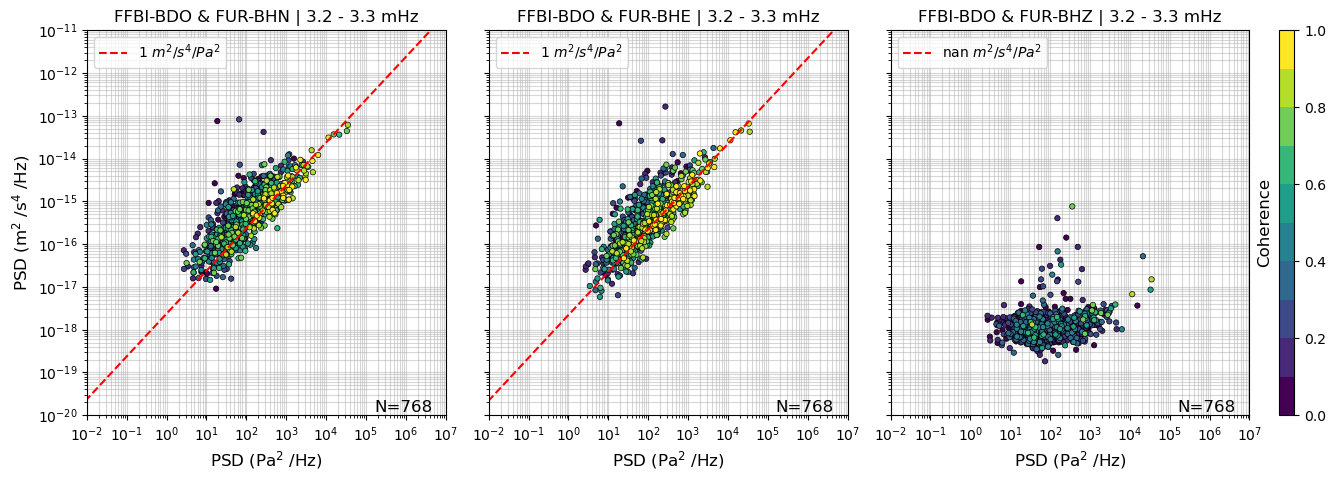

dates      float64
0.00345    float64
dtype: object
dates      float64
0.00345    float64
dtype: object
dates      float64
0.00345    float64
dtype: object
dates      float64
0.00345    float64
dtype: object
dates      float64
0.00345    float64
dtype: object
dates      float64
0.00345    float64
dtype: object
dates      float64
0.00345    float64
dtype: object


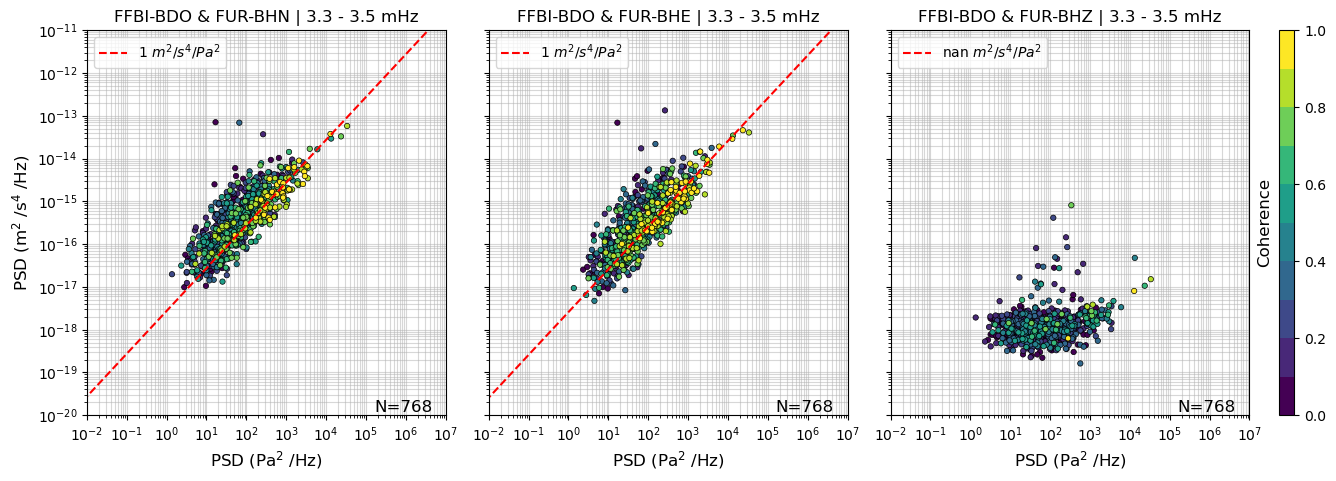

dates      float64
0.00365    float64
dtype: object
dates      float64
0.00365    float64
dtype: object
dates      float64
0.00365    float64
dtype: object
dates      float64
0.00365    float64
dtype: object
dates      float64
0.00365    float64
dtype: object
dates      float64
0.00365    float64
dtype: object
dates      float64
0.00365    float64
dtype: object


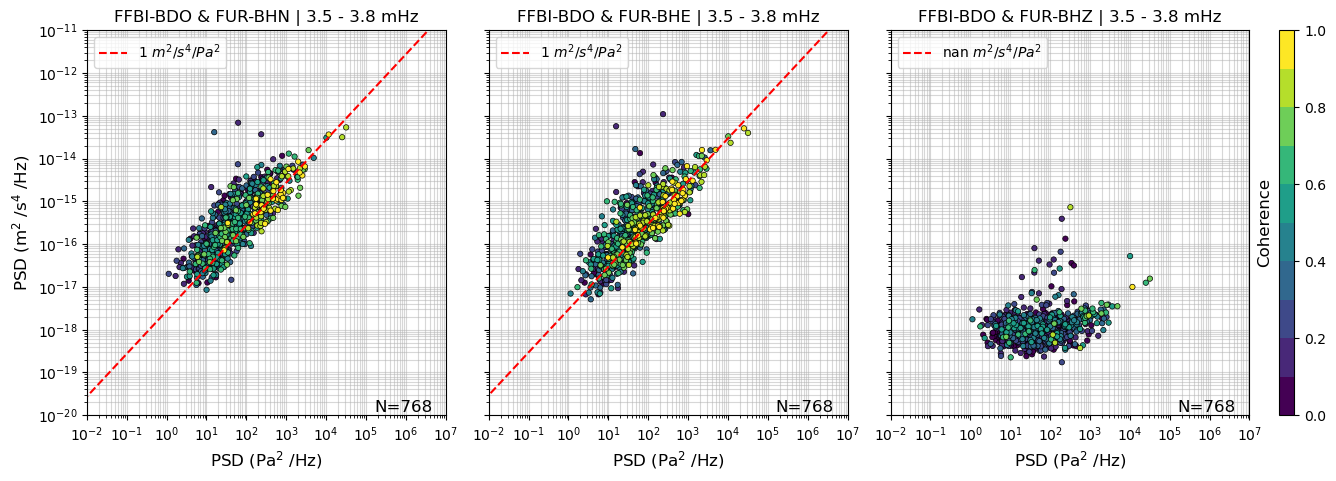

dates      float64
0.00387    float64
dtype: object
dates      float64
0.00387    float64
dtype: object
dates      float64
0.00387    float64
dtype: object
dates      float64
0.00387    float64
dtype: object
dates      float64
0.00387    float64
dtype: object
dates      float64
0.00387    float64
dtype: object
dates      float64
0.00387    float64
dtype: object


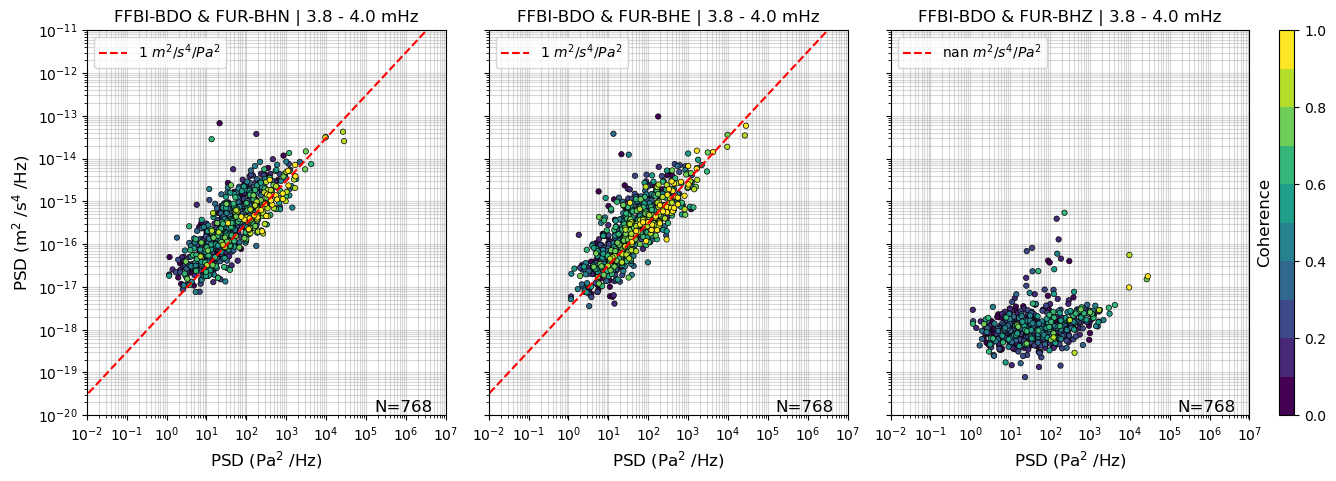

dates     float64
0.0041    float64
dtype: object
dates     float64
0.0041    float64
dtype: object
dates     float64
0.0041    float64
dtype: object
dates     float64
0.0041    float64
dtype: object
dates     float64
0.0041    float64
dtype: object
dates     float64
0.0041    float64
dtype: object
dates     float64
0.0041    float64
dtype: object


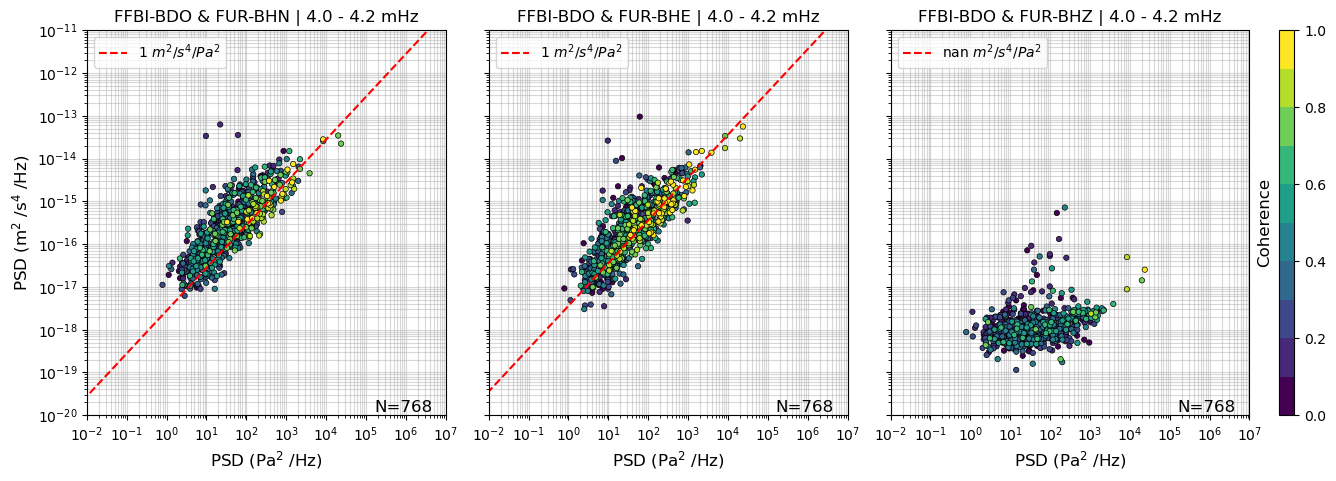

dates      float64
0.00434    float64
dtype: object
dates      float64
0.00434    float64
dtype: object
dates      float64
0.00434    float64
dtype: object
dates      float64
0.00434    float64
dtype: object
dates      float64
0.00434    float64
dtype: object
dates      float64
0.00434    float64
dtype: object
dates      float64
0.00434    float64
dtype: object


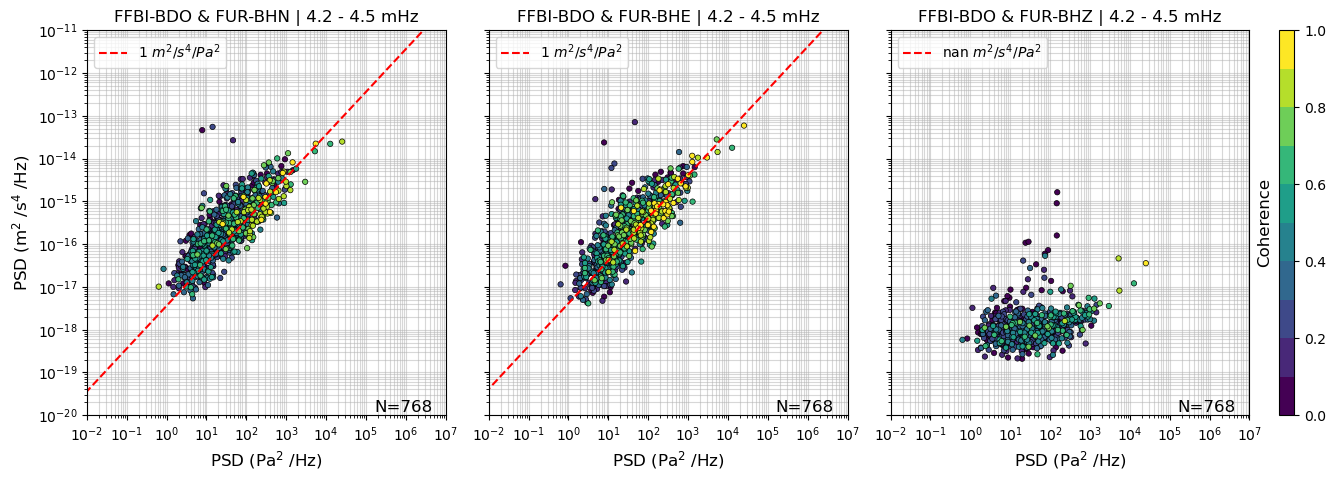

dates     float64
0.0046    float64
dtype: object
dates     float64
0.0046    float64
dtype: object
dates     float64
0.0046    float64
dtype: object
dates     float64
0.0046    float64
dtype: object
dates     float64
0.0046    float64
dtype: object
dates     float64
0.0046    float64
dtype: object
dates     float64
0.0046    float64
dtype: object


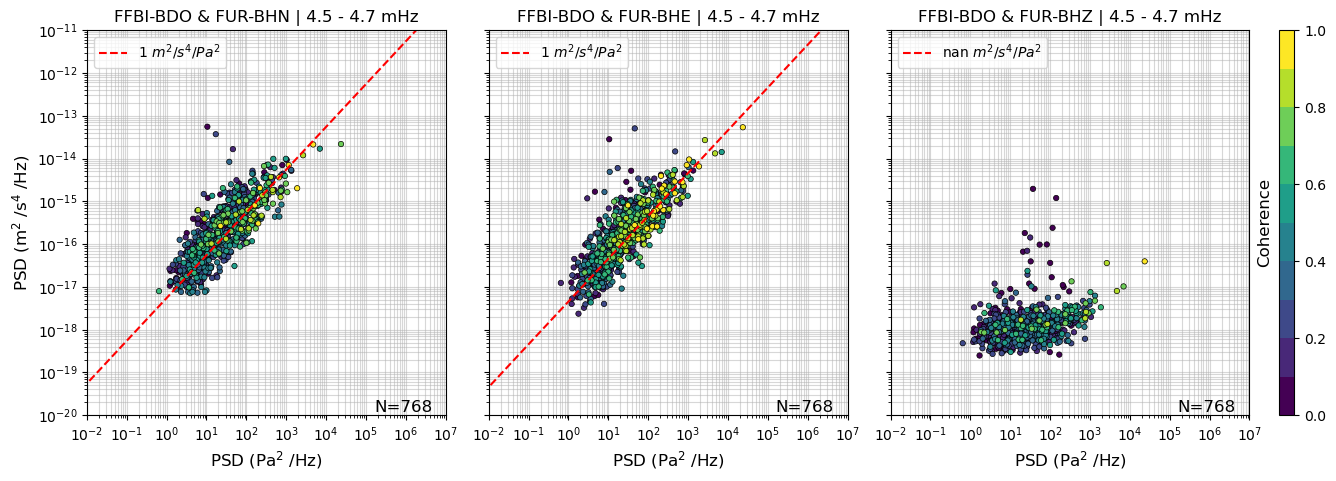

dates      float64
0.00487    float64
dtype: object
dates      float64
0.00487    float64
dtype: object
dates      float64
0.00487    float64
dtype: object
dates      float64
0.00487    float64
dtype: object
dates      float64
0.00487    float64
dtype: object
dates      float64
0.00487    float64
dtype: object
dates      float64
0.00487    float64
dtype: object


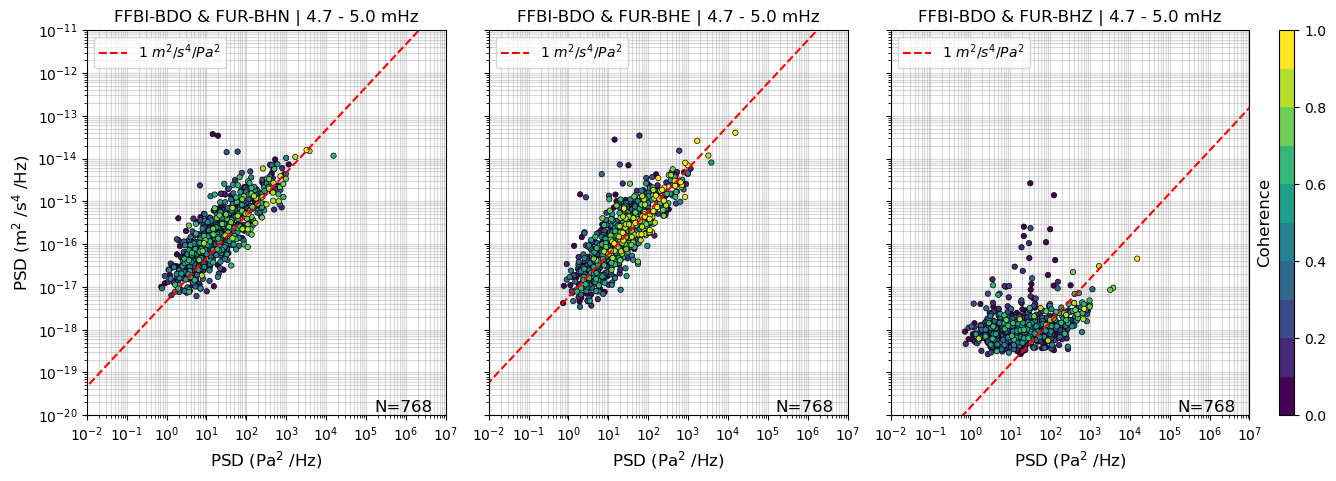

dates      float64
0.00516    float64
dtype: object
dates      float64
0.00516    float64
dtype: object
dates      float64
0.00516    float64
dtype: object
dates      float64
0.00516    float64
dtype: object
dates      float64
0.00516    float64
dtype: object
dates      float64
0.00516    float64
dtype: object
dates      float64
0.00516    float64
dtype: object


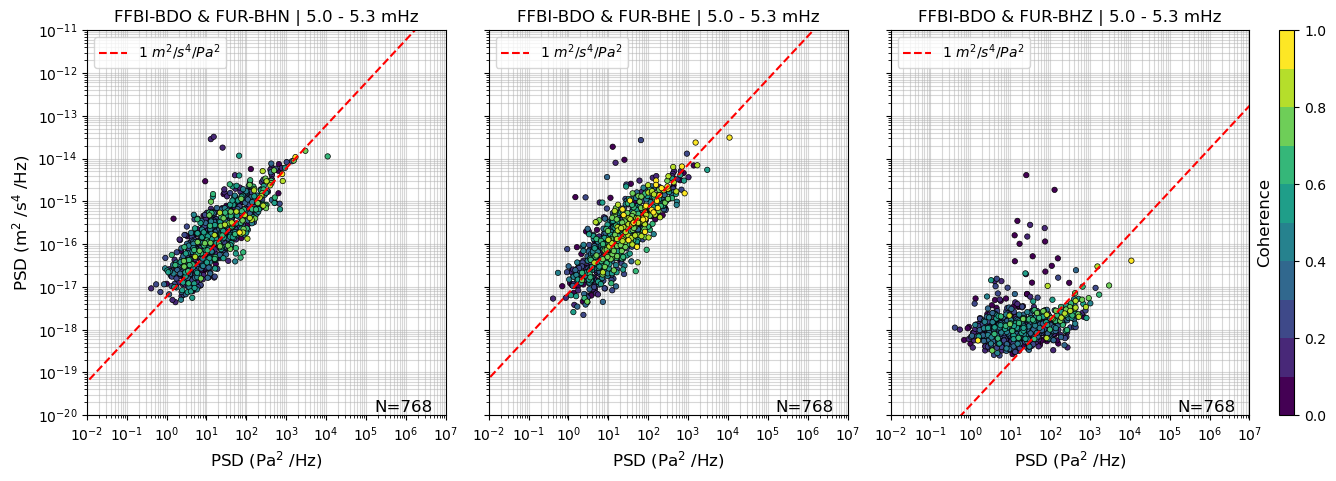

dates      float64
0.00546    float64
dtype: object
dates      float64
0.00546    float64
dtype: object
dates      float64
0.00546    float64
dtype: object
dates      float64
0.00546    float64
dtype: object
dates      float64
0.00546    float64
dtype: object
dates      float64
0.00546    float64
dtype: object
dates      float64
0.00546    float64
dtype: object


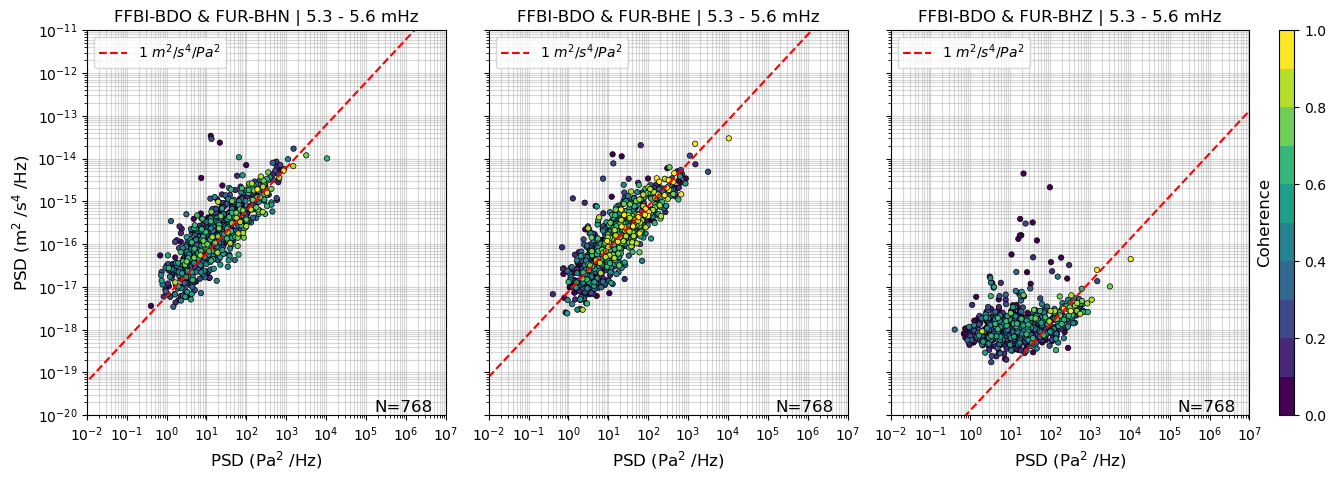

dates      float64
0.00579    float64
dtype: object
dates      float64
0.00579    float64
dtype: object
dates      float64
0.00579    float64
dtype: object
dates      float64
0.00579    float64
dtype: object
dates      float64
0.00579    float64
dtype: object
dates      float64
0.00579    float64
dtype: object
dates      float64
0.00579    float64
dtype: object


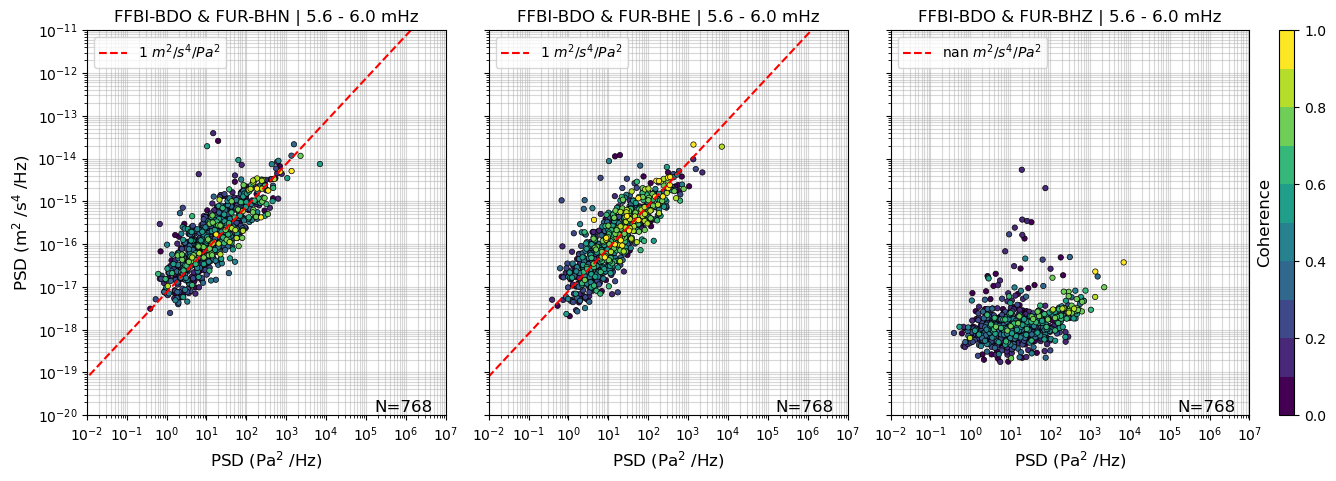

dates      float64
0.00613    float64
dtype: object
dates      float64
0.00613    float64
dtype: object
dates      float64
0.00613    float64
dtype: object
dates      float64
0.00613    float64
dtype: object
dates      float64
0.00613    float64
dtype: object
dates      float64
0.00613    float64
dtype: object
dates      float64
0.00613    float64
dtype: object


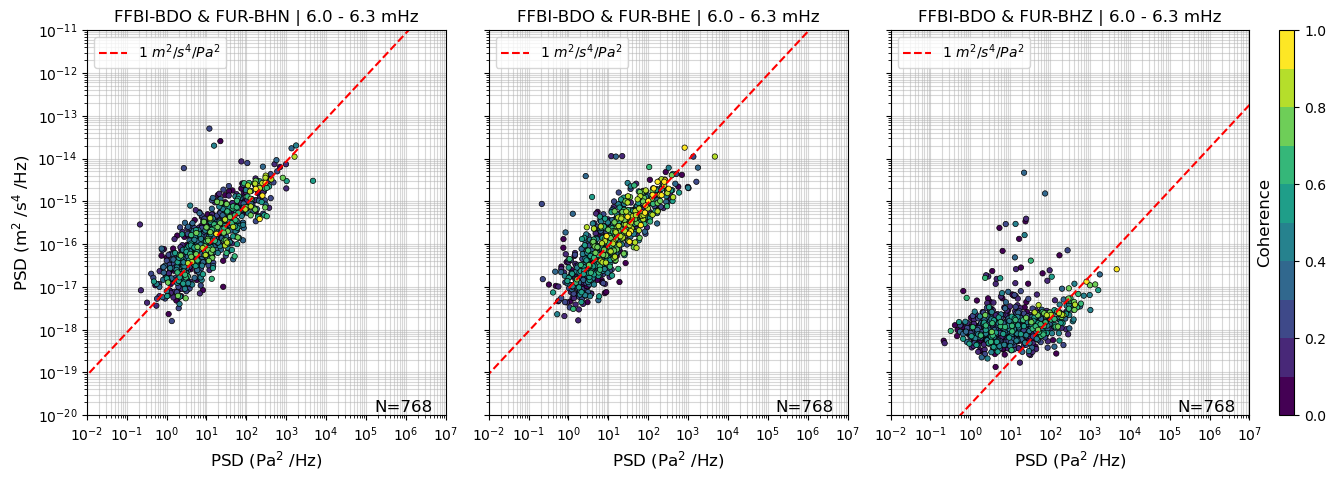

dates      float64
0.00649    float64
dtype: object
dates      float64
0.00649    float64
dtype: object
dates      float64
0.00649    float64
dtype: object
dates      float64
0.00649    float64
dtype: object
dates      float64
0.00649    float64
dtype: object
dates      float64
0.00649    float64
dtype: object
dates      float64
0.00649    float64
dtype: object


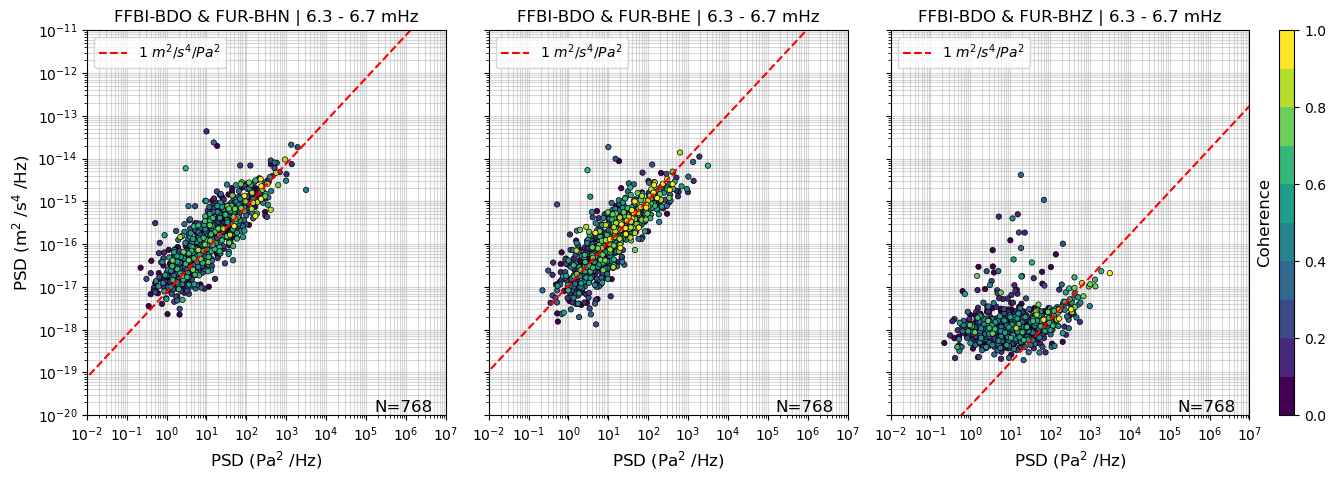

dates      float64
0.00688    float64
dtype: object
dates      float64
0.00688    float64
dtype: object
dates      float64
0.00688    float64
dtype: object
dates      float64
0.00688    float64
dtype: object
dates      float64
0.00688    float64
dtype: object
dates      float64
0.00688    float64
dtype: object
dates      float64
0.00688    float64
dtype: object


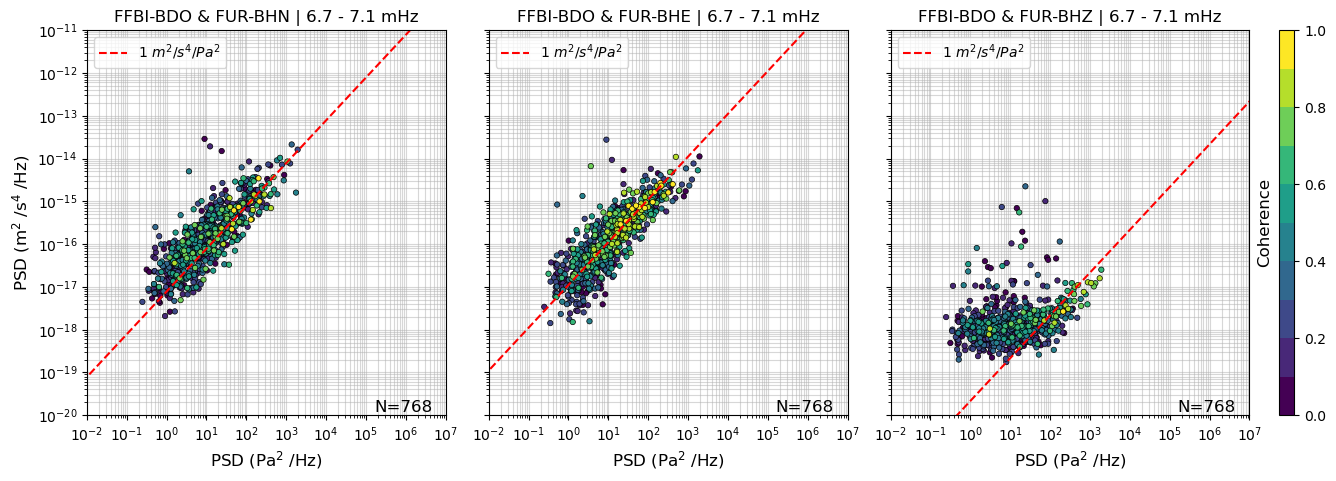

dates      float64
0.00729    float64
dtype: object
dates      float64
0.00729    float64
dtype: object
dates      float64
0.00729    float64
dtype: object
dates      float64
0.00729    float64
dtype: object
dates      float64
0.00729    float64
dtype: object
dates      float64
0.00729    float64
dtype: object
dates      float64
0.00729    float64
dtype: object


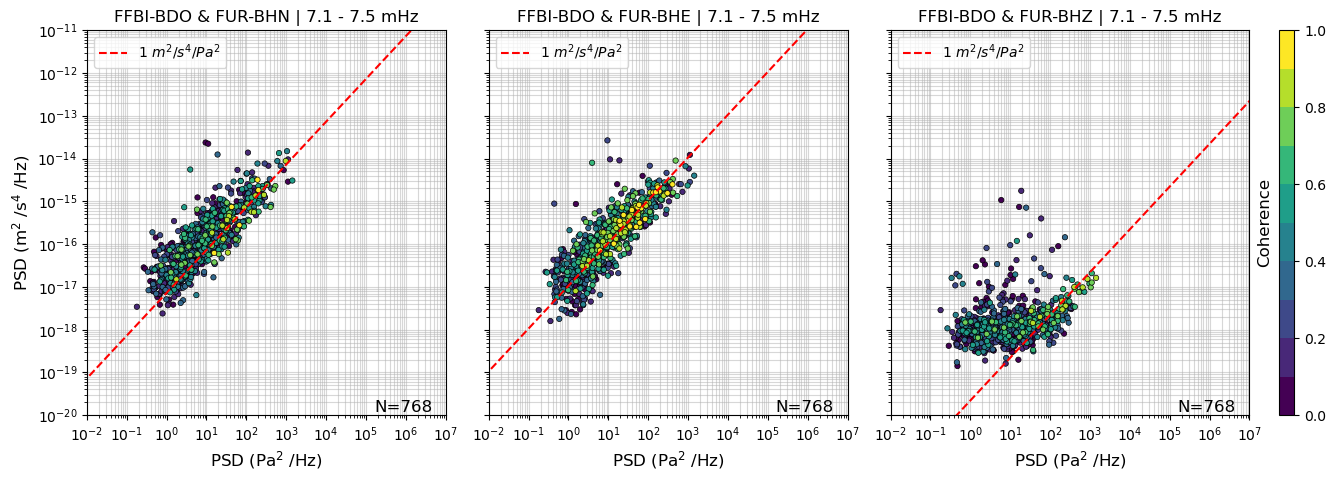

dates      float64
0.00772    float64
dtype: object
dates      float64
0.00772    float64
dtype: object
dates      float64
0.00772    float64
dtype: object
dates      float64
0.00772    float64
dtype: object
dates      float64
0.00772    float64
dtype: object
dates      float64
0.00772    float64
dtype: object
dates      float64
0.00772    float64
dtype: object


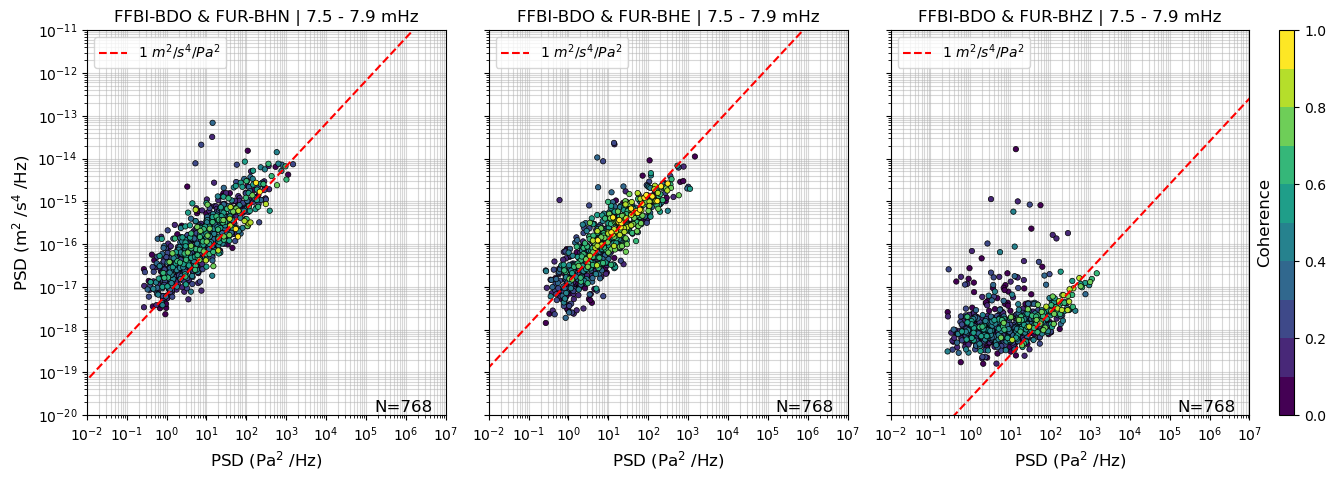

dates      float64
0.00818    float64
dtype: object
dates      float64
0.00818    float64
dtype: object
dates      float64
0.00818    float64
dtype: object
dates      float64
0.00818    float64
dtype: object
dates      float64
0.00818    float64
dtype: object
dates      float64
0.00818    float64
dtype: object
dates      float64
0.00818    float64
dtype: object


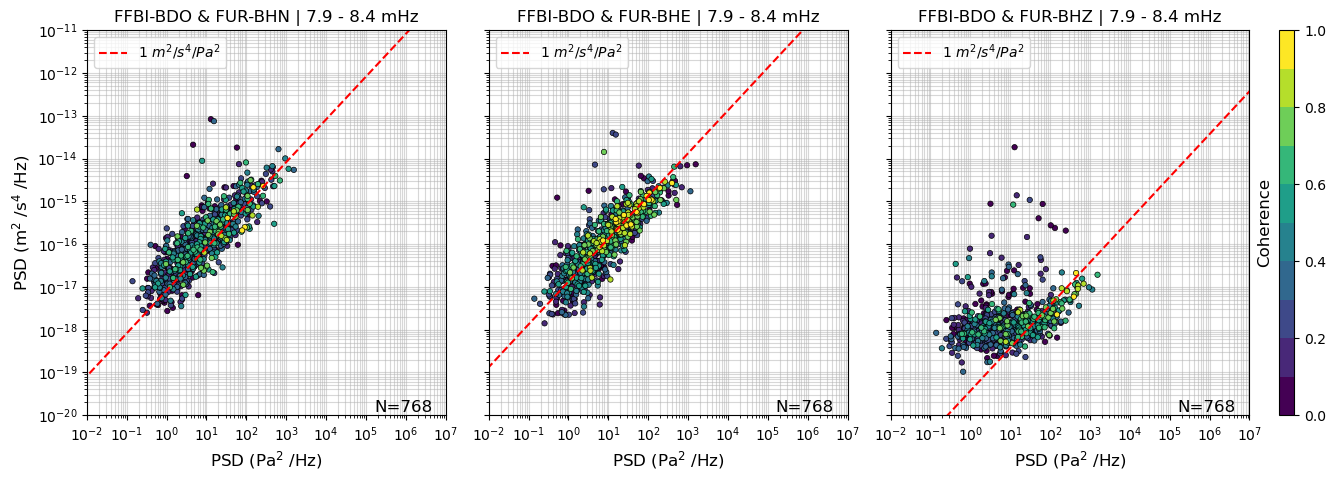

dates      float64
0.00866    float64
dtype: object
dates      float64
0.00866    float64
dtype: object
dates      float64
0.00866    float64
dtype: object
dates      float64
0.00866    float64
dtype: object
dates      float64
0.00866    float64
dtype: object
dates      float64
0.00866    float64
dtype: object
dates      float64
0.00866    float64
dtype: object


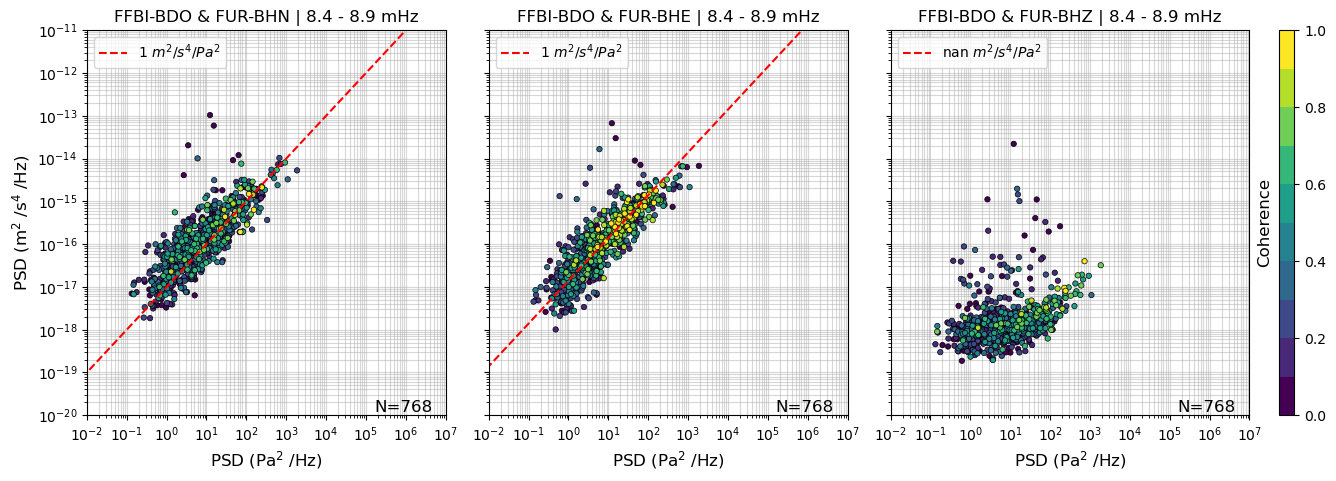

dates      float64
0.00917    float64
dtype: object
dates      float64
0.00917    float64
dtype: object
dates      float64
0.00917    float64
dtype: object
dates      float64
0.00917    float64
dtype: object
dates      float64
0.00917    float64
dtype: object
dates      float64
0.00917    float64
dtype: object
dates      float64
0.00917    float64
dtype: object


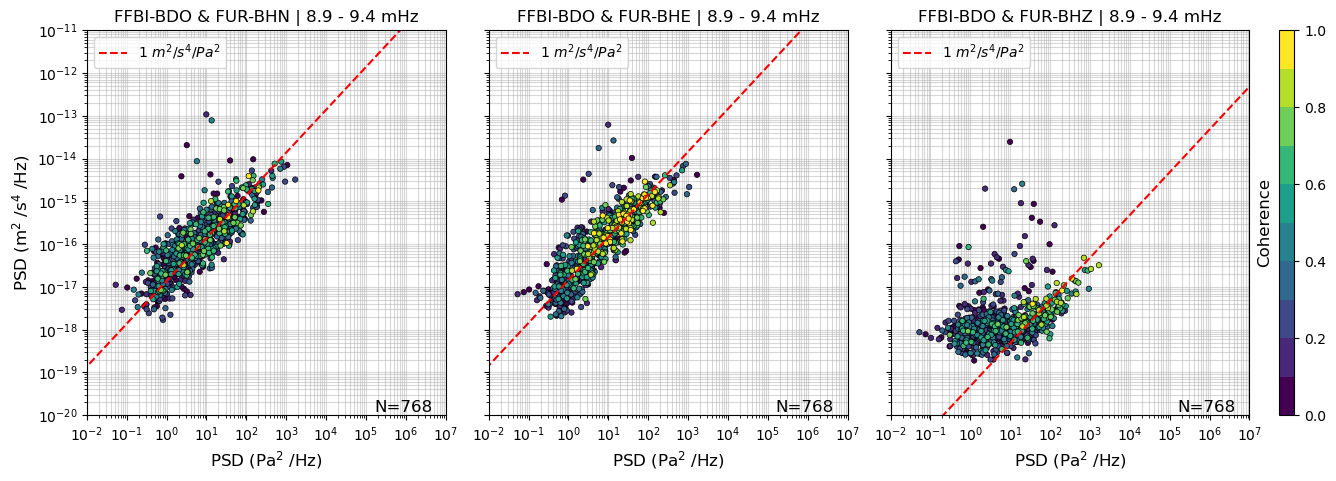

In [ ]:
import matplotlib.ticker as mticker

f_lower, f_upper, f_center = __get_octave_bands(1e-3, 1e0, faction_of_octave=12, plot=False)

N_bands = dat0.shape[1] - 1

bands = dat0.keys()[1:]

## compliance
compl = pd.DataFrame()
compl['fl'] = f_lower
compl['fu'] = f_upper
compl['fc'] = f_center

complN, complE, complZ = np.ones(N_bands)*np.nan, np.ones(N_bands)*np.nan, np.ones(N_bands)*np.nan

for _n, band in enumerate(bands):


    # if not _n == 13:
    #     continue

    _dat0 = dat0.loc[:, ["dates", band]]
    _dat1 = dat1.loc[:, ["dates", band]]
    _dat2 = dat2.loc[:, ["dates", band]]
    _dat3 = dat3.loc[:, ["dates", band]]

    _coh1 = coh1.loc[:, ["dates", band]]
    _coh2 = coh2.loc[:, ["dates", band]]
    _coh3 = coh3.loc[:, ["dates", band]]


    ## join data frames based on dates and hour
    _df1 = pd.merge(left=_dat0, right=_dat1, how="inner", on="dates")
    _df2 = pd.merge(left=_dat0, right=_dat2, how="inner", on="dates")
    _df3 = pd.merge(left=_dat0, right=_dat3, how="inner", on="dates")

    _df1 = pd.merge(left=_df1, right=_coh1, how="inner", on="dates")
    _df2 = pd.merge(left=_df2, right=_coh2, how="inner", on="dates")
    _df3 = pd.merge(left=_df3, right=_coh3, how="inner", on="dates")

    # ## remove NaN values
    _df1.dropna(inplace=True)
    _df2.dropna(inplace=True)
    _df3.dropna(inplace=True)

    ## remove large values
    _df1 = _df1[_df1.iloc[:, 2] < 1e-11]
    _df2 = _df2[_df2.iloc[:, 2] < 1e-11]
    _df3 = _df3[_df3.iloc[:, 2] < 1e-11]

    ## reset the index
    _df1 = _df1.reset_index(drop=True)
    _df2 = _df2.reset_index(drop=True)
    _df3 = _df3.reset_index(drop=True)

    _df1 = _df1.sort_values(by=band, ascending=True)
    _df2 = _df2.sort_values(by=band, ascending=True)
    _df3 = _df3.sort_values(by=band, ascending=True)

    xx1, yy1, ccoh1 = np.log10(_df1.iloc[:, 1]), np.log10(_df1.iloc[:, 2]), _df1.iloc[:, 3]
    xx2, yy2, ccoh2 = np.log10(_df2.iloc[:, 1]), np.log10(_df2.iloc[:, 2]), _df2.iloc[:, 3]
    xx3, yy3, ccoh3 = np.log10(_df3.iloc[:, 1]), np.log10(_df3.iloc[:, 2]), _df3.iloc[:, 3]

#     try:
#         pre1 = __quantile_regression(xx1, yy1, quantiles=[0.01, 0.5, 0.99])
#         pre2 = __quantile_regression(xx2, yy2, quantiles=[0.01, 0.5, 0.99])
#         pre3 = __quantile_regression(xx3, yy3, quantiles=[0.01, 0.5, 0.99])

#     except Exception as e:
#         print(e)
#         pass

    ## only select high coherence (=hc)
    coh_thres = 0.8
    df1_hc = _df1_high_coh = _df1[_df1.iloc[:, 3] > coh_thres]
    df2_hc = _df2_high_coh = _df2[_df2.iloc[:, 3] > coh_thres]
    df3_hc = _df3_high_coh = _df3[_df3.iloc[:, 3] > coh_thres]

    xx1_hc, yy1_hc = np.log10(df1_hc.iloc[:, 1]), np.log10(df1_hc.iloc[:, 2])
    xx2_hc, yy2_hc = np.log10(df2_hc.iloc[:, 1]), np.log10(df2_hc.iloc[:, 2])
    xx3_hc, yy3_hc = np.log10(df3_hc.iloc[:, 1]), np.log10(df3_hc.iloc[:, 2])


    try:
        if len(xx1_hc) >= 10:
            odr1_slope, odr1_inter = __compute_orthogonal_distance_regression(xx1_hc, yy1_hc, xerr=None, yerr=None, bx=None, by=None)
        else:
            odr1_slope = np.nan
        if len(xx2_hc) >= 10:
            odr2_slope, odr2_inter = __compute_orthogonal_distance_regression(xx2_hc, yy2_hc, xerr=None, yerr=None, bx=None, by=None)
        else:
            odr2_slope = np.nan
        if len(xx3_hc) >= 10:
            odr3_slope, odr3_inter = __compute_orthogonal_distance_regression(xx3_hc, yy3_hc, xerr=None, yerr=None, bx=None, by=None)
        else:
            odr3_slope = np.nan
        try:
            complN[_n] = np.sqrt(odr1_slope)
        except:
            complN[_n] = np.nan
        try:
            complE[_n] = np.sqrt(odr2_slope)
        except:
            complE[_n] = np.nan
        try:
            complZ[_n] = np.sqrt(odr3_slope)
        except:
            complZ[_n] = np.nan

    except Exception as e:
        complN[_n], complE[_n], complZ[_n] = np.nan, np.nan, np.nan
        print(e)
        pass


    ## ____________________________________________________________________

    fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

    font = 12

    cmap = plt.colormaps.get("viridis")
    cmap = plt.get_cmap("viridis", 10)

    plt.subplots_adjust(wspace=0.12)

    ca1 = ax[0].scatter(10**xx1, 10**yy1, s=15, c=ccoh1, edgecolors="black", lw=0.5, zorder=2, cmap=cmap, vmin=0., vmax=1)
    ca2 = ax[1].scatter(10**xx2, 10**yy2, s=15, c=ccoh2, edgecolors="black", lw=0.5, zorder=2, cmap=cmap, vmin=0., vmax=1)
    ca3 = ax[2].scatter(10**xx3, 10**yy3, s=15, c=ccoh3, edgecolors="black", lw=0.5, zorder=2, cmap=cmap, vmin=0., vmax=1)

#     try:
#         ax[0].plot(10**xx1, 10**pre1[0.01], color="k", zorder=1, ls=":", label="90%-fit")
#         ax[1].plot(10**xx2, 10**pre2[0.01], color="k", zorder=1, ls=":", label="90%-fit")
#         ax[2].plot(10**xx3, 10**pre3[0.01], color="k", zorder=1, ls=":", label="90%-fit")
#     except Exception as e:
#         print(e)
#         pass

    ## add correlation estimate
    _xx = np.logspace(-10, 10, 100)
    _yy = 1e-22 * _xx

    # ax[0].plot(_xx, _yy + _xx*1e-17, color="darkred", ls="--", label="1 $m^2/s^4/Pa^2$")
    # ax[1].plot(_xx, _yy + _xx*1e-17, color="darkred", ls="--", label="1 $m^2/s^4/Pa^2$")
    # ax[2].plot(_xx, _yy + _xx*1e-19, color="darkred", ls="--", label="1 $m^2/s^4/Pa^2$")

    try:
        _xx = np.linspace(-10, 10, 100)
        for _i, (slope, intercept) in enumerate(zip([odr1_slope, odr2_slope, odr3_slope], [odr1_inter, odr2_inter, odr3_inter])):
            ax[_i].plot(10**(_xx), 10**(_xx*slope+intercept), color="red", ls="--", label=f"{round(slope,3)} $m^2/s^4/Pa^2$")
            # ax[_i].plot(10**(_xx), 10**(_xx*1+intercept), color="red", ls="--", label=f"{round(slope,3)} $m^2/s^4/Pa^2$")
    except Exception as e:
        print(e)
        pass

    for _i in range(3):
        ax[_i].set_xscale("log")
        ax[_i].set_yscale("logit")
        ax[_i].set_xlim(1e-2, 1e7)
        ax[_i].set_ylim(1e-20, 1e-11)
        ax[_i].grid(zorder=0, alpha=0.5, which="both")
        ax[_i].legend(loc=2)
        ax[_i].set_xlabel(r"PSD (Pa$^2$ /Hz)", fontsize=font)

        ax[_i].xaxis.set_major_locator(mticker.LogLocator(numticks=999))
        ax[_i].xaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))

    # ax[0].set_title(f"{name0.replace('_','-')} & {name1.replace('_','-')} | fc = {float(_df1.keys()[1][:-2])*1e3} mHz")
    # ax[1].set_title(f"{name0.replace('_','-')} & {name2.replace('_','-')} | fc = {float(_df2.keys()[1][:-2])*1e3} mHz")
    # ax[2].set_title(f"{name0.replace('_','-')} & {name3.replace('_','-')} | fc = {float(_df3.keys()[1][:-2])*1e3} mHz")
    ax[0].set_title(f"{name0.replace('_','-')} & {name1.replace('_','-')} | {round(f_lower[_n]*1e3, 1)} - {round(f_upper[_n]*1e3, 1)} mHz")
    ax[1].set_title(f"{name0.replace('_','-')} & {name2.replace('_','-')} | {round(f_lower[_n]*1e3, 1)} - {round(f_upper[_n]*1e3, 1)} mHz")
    ax[2].set_title(f"{name0.replace('_','-')} & {name3.replace('_','-')} | {round(f_lower[_n]*1e3, 1)} - {round(f_upper[_n]*1e3, 1)} mHz")

    ax[0].text(.8, .04, f"N={len(xx1)}", ha='left', va='top', transform=ax[0].transAxes, fontsize=font)
    ax[1].text(.8, .04, f"N={len(xx2)}", ha='left', va='top', transform=ax[1].transAxes, fontsize=font)
    ax[2].text(.8, .04, f"N={len(xx3)}", ha='left', va='top', transform=ax[2].transAxes, fontsize=font)

    ax[0].set_ylabel(r"PSD (m$^2$ /s$^4$ /Hz)", fontsize=font)

    ## add colorbar
    cbar_ax = fig.add_axes([0.92, 0.11, 0.01, 0.77]) #[left, bottom, width, height]
    cb = plt.colorbar(ca1, cax=cbar_ax)
    cb.set_label("Coherence", fontsize=font, labelpad=-50, color="black")

    plt.show();

    fig.savefig(config['path_to_figs']+f"all/{str(_n).rjust(3, '0')}_{name1}_{name2}_{band}Hz_all.png", format="png", dpi=200, bbox_inches='tight');


# compl['N'] = complN
# compl['E'] = complE
# compl['Z'] = complZ


## Compliance Plot

In [ ]:
def __makeplot():

    Nrow, Ncol = 1, 1

    font = 12

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(10, 5))

    ax.plot(compl['fc'], compl['Z'], label="FUR.Z")
    ax.plot(compl['fc'], compl['N'], label="FUR.N")
    ax.plot(compl['fc'], compl['E'], label="FUR.E")

    ax.grid(ls=":", zorder=0)
    ax.legend(loc=1)

    ax.set_xscale("log")
    # ax.set_yscale("log")

    ax.set_xlim(1e-3, 1e0)

    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Compliance (m/s$^2$/Pa)")

    plt.show();
    return fig

In [ ]:
compl = compl.replace(1.0, np.nan)

fig = __makeplot();

fig.savefig(config['path_to_figs']+f"FUR_compliance.png", format="png", dpi=200, bbox_inches='tight')

In [ ]:
# _df2_high_coh = _df2[_df2.iloc[:, 3] > 0.8]

# _x_high_coh = np.log10(_df2_high_coh.iloc[:, 1])
# _y_high_coh = np.log10(_df2_high_coh.iloc[:, 2])

# x = np.linspace(min(_x_high_coh), max(_x_high_coh), 100)
# a, b = __compute_orthogonal_distance_regression(_x_high_coh, _y_high_coh, xerr=None, yerr=None, bx=None, by=None)

# plt.scatter(10**_x_high_coh, 10**_y_high_coh)
# plt.plot(10**(x), 10**(x*a+b))
# plt.xscale("log")
# plt.yscale("log")
# print(x)